<a href="https://colab.research.google.com/github/fmahboub/Reinforcement_Learning_Playground/blob/main/Reinforcement_Learning_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Original Work


## First Custom Environment




In [1]:
!pip install stable_baselines3

In [12]:
import numpy as np
import gym
from gym import spaces
from stable_baselines3 import PPO, A2C 
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.env_checker import check_env


class GoDownLeftEnv(gym.Env):
  """
  Custom Environment that follows gym interface.
  This is a simple env where the agent must learn to go always down and left. 
  """
  # Because of google colab, we cannot implement the GUI ('human' render mode)
  metadata = {'render.modes': ['console']}
  # Define constants for clearer code
  LEFT = 0
  RIGHT = 1
  UP = 2
  DOWN = 3

  def __init__(self, grid_size=10):
    super(GoDownLeftEnv, self).__init__()

    # Size of the 2D-grid
    self.grid_size = grid_size
    # Initialize the agent at the right of the grid
    self.agent_posx = grid_size - 1
    self.agent_posy = grid_size - 1

    # Define action and observation space
    # They must be gym.spaces objects
    # Example when using discrete actions, we have two: left and right
    n_actions = 4
    self.action_space = spaces.Discrete(n_actions)
    # The observation will be the coordinate of the agent
    # this can be described both by Discrete and Box space
    self.observation_space = spaces.Box(low=1, high=self.grid_size,
                                        shape=(2,), dtype=np.float32)

  def reset(self):
    """
    Important: the observation must be a numpy array
    :return: (np.array) 
    """
    # Initialize the agent at the right of the grid
    self.agent_posx = self.grid_size - 1
    self.agent_posy = self.grid_size - 1
    # here we convert to float32 to make it more general (in case we want to use continuous actions)
    return np.array([self.agent_posx,self.agent_posy]).astype(np.float32)

  def step(self, action):
    if action == self.LEFT:
      self.agent_posx -= 1
    elif action == self.RIGHT:
      self.agent_posx += 1
    elif action == self.UP:
      self.agent_posy += 1
    elif action == self.DOWN:
      self.agent_posy -= 1
    else:
      raise ValueError("Received invalid action={} which is not part of the action space".format(action))

    # Account for the boundaries of the grid
    self.agent_posx = np.clip(self.agent_posx, 1, self.grid_size)
    self.agent_posy = np.clip(self.agent_posy, 1, self.grid_size)

    # Are we at the left of the grid?
    done = bool(self.agent_posx == 1 and self.agent_posy == 1)

    # Null reward everywhere except when reaching the goal (left of the grid)
    reward = 1 if self.agent_posx == 1 and self.agent_posy == 1 else 0

    # Optionally we can pass additional info, we are not using that for now
    info = {}

    return np.array([self.agent_posx, self.agent_posy]).astype(np.float32), reward, done, info

  def render(self, mode='console'):
    if mode != 'console':
      raise NotImplementedError()
    # agent is represented as a cross, rest as a dot
    x_string = ". " *(self.agent_posx-1)+"x "+". "*(self.grid_size - self.agent_posx)
    for x in range(self.grid_size-self.agent_posy):
      print('. '*self.grid_size)
    print(x_string)
    for x in range(self.agent_posy-1):
      print('. '*self.grid_size)

  def close(self):
    pass
    

In [13]:
env = GoDownLeftEnv()
# If the environment don't follow the interface, an error will be thrown
check_env(env, warn=True)

In [15]:
# Train the agent
# Instantiate the env
env = GoDownLeftEnv(grid_size=15)
# wrap it
env = make_vec_env(lambda: env, n_envs=1)
model = A2C('MlpPolicy', env, verbose=1).learn(10000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 631      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -1.34    |
|    explained_variance | -3.74    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.00124  |
|    value_loss         | 3.02e-06 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 645       |
|    iterations         | 200       |
|    time_elapsed       | 1         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -1.29     |
|    explained_variance | -3.54     |
|    learning_rate      | 0.0007    |
|    n_updates          | 199       |
|    policy_loss        | -0.000818 |
|    valu

In [16]:
# Test the trained agent
obs = env.reset()
n_steps = 30
for step in range(n_steps):
  action, _ = model.predict(obs, deterministic=True)
  print("Step {}".format(step + 1))
  print("Action: ", action)
  obs, reward, done, info = env.step(action)
  print('obs=', obs, 'reward=', reward, 'done=', done)
  env.render(mode='console')
  if done:
    # Note that the VecEnv resets automatically
    # when a done signal is encountered
    print("Goal reached!", "reward=", reward,'\n')
    break

Step 1
Action:  [0]
obs= [[13. 14.]] reward= [0.] done= [False]
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . x . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
Step 2
Action:  [0]
obs= [[12. 14.]] reward= [0.] done= [False]
. . . . . . . . . . . . . . . 
. . . . . . . . . . . x . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . 

## 2D Env with Obstacles

In [ ]:
import numpy as np
import time
import gym
from gym import spaces
import random
from stable_baselines3 import PPO, A2C # DQN coming soon
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.env_checker import check_env


class GoDownLeftEnv(gym.Env):
  """
  Custom Environment that follows gym interface.
  This is a simple env where the agent must learn to go always left. 
  """
  # Because of google colab, we cannot implement the GUI ('human' render mode)
  metadata = {'render.modes': ['console']}
  # Define constants for clearer code
  LEFT = 0
  RIGHT = 1
  UP = 2
  DOWN = 3

  def __init__(self, grid_size=10):
    super(GoDownLeftEnv, self).__init__()

    # Size of the 2D-grid
    self.grid_size = grid_size
    # Initialize the agent at the right of the grid
    self.agent_posx = grid_size - 1
    self.agent_posy = grid_size - 1

    # Define action and observation space
    # They must be gym.spaces objects
    # Example when using discrete actions, we have two: left and right
    n_actions = 4
    self.action_space = spaces.Discrete(n_actions)
    # The observation will be the coordinate of the agent
    # this can be described both by Discrete and Box space
    self.observation_space = spaces.Box(low=np.array([1,1,0,0,0,0]), 
                            high=np.array([self.grid_size, self.grid_size,1,1,1,1]), dtype=np.float32)
    self.steps = 0

  def reset(self):
    """
    Important: the observation must be a numpy array
    :return: (np.array) 
    """
    # Initialize the agent at the right of the grid
    self.block_left = 0
    self.block_right = 0
    self.block_up = 0
    self.block_down = 0
    self.agent_posx = self.grid_size - 1
    self.agent_posy = self.grid_size - 1
    self.sample_size = [i+1 for i in range(self.grid_size)]
    # random.seed(0)
    self.env_obstacles = list(zip(random.sample(self.sample_size, int(self.grid_size/1)),
                                  random.sample(self.sample_size, int(self.grid_size/1))))
    try:
      self.env_obstacles.remove((1,1))
    except:
      None
    # self.env_obstacles = []
    self.steps = 0

    # here we convert to float32 to make it more general (in case we want to use continuous actions)
    return np.array([self.agent_posx, self.agent_posy,self.block_left,self.block_right,self.block_up,
                     self.block_down]).astype(np.float32)

  def step(self, action):
    self.steps += 1
    self.block_left = 0
    self.block_right = 0
    self.block_up = 0
    self.block_down = 0
    if action == self.LEFT:
      if ((self.agent_posx - 1), self.agent_posy) not in self.env_obstacles:
        self.agent_posx -= 1
        self.reward = 0.01
      else:
        self.block_left = 1
        self.reward = 0
    elif action == self.RIGHT:
      if ((self.agent_posx + 1), self.agent_posy) not in self.env_obstacles:
        self.agent_posx += 1
        self.reward = -0.01
      else:
        self.block_right = 1
        self.reward = 0
    elif action == self.UP:
      if ((self.agent_posx), self.agent_posy + 1) not in self.env_obstacles:
        self.agent_posy += 1
        self.reward = -0.01
      else:
        self.block_up = 1 
        self.reward = 0
    elif action == self.DOWN:
      if ((self.agent_posx), self.agent_posy - 1) not in self.env_obstacles:
        self.agent_posy -= 1
        self.reward = 0.01
      else:
        self.block_down = 1
        self.reward = 0
    else:
      raise ValueError("Received invalid action={} which is not part of the action space".format(action))
    self.steps += 1

    # Account for the boundaries of the grid
    if self.agent_posx < 1:
      self.agent_posx = np.clip(self.agent_posx, 1, self.grid_size)
      self.block_left = 1
      self.reward = 0 
    elif self.agent_posx > self.grid_size:
      self.agent_posx = np.clip(self.agent_posx, 1, self.grid_size)
      self.block_right = 1
      self.reward = 0 
    elif self.agent_posy < 1:
      self.agent_posy = np.clip(self.agent_posy, 1, self.grid_size)
      self.block_down = 1
      self.reward = 0 
    elif self.agent_posy > self.grid_size:
      self.agent_posy = np.clip(self.agent_posy, 1, self.grid_size)
      self.block_up = 1
      self.reward = 0 

    # Are we at the left of the grid?
    done = bool(self.agent_posx == 1 and self.agent_posy == 1)
    # done = bool(self.steps >= 30)

    # Null reward everywhere except when reaching the goal (left of the grid)
    # reward = 1 if self.agent_posx == 1 and self.agent_posy == 1 else 0

    if self.agent_posx == 1 and self.agent_posy == 1:
      min_steps = (self.grid_size-2)*2
      reward = 1000/(self.steps-min_steps) 
      # reward = 1
    else:
      reward = self.reward
      # reward = 0
    
    # reward = ((self.grid_size - self.agent_posx) + (self.grid_size - self.agent_posy))/(2*self.grid_size-2)
    

    # Optionally we can pass additional info, we are not using that for now
    info = {}

    return np.array([self.agent_posx, self.agent_posy,self.block_left,self.block_right,self.block_up,
                     self.block_down]).astype(np.float32), reward, done, info

  def render(self, mode='console'):
    if mode != 'console':
      raise NotImplementedError()
    # agent is represented as a cross, obstacles as O, and rest as a dot
    posx = self.agent_posx
    posy = self.agent_posy
    grid_size = self.grid_size
    grid_list = []
    # Set up grid with agent
    for row in (range(grid_size)):
      row_string = ''
      for col in range(grid_size):
        if  col+1 == posx and (grid_size-row) == posy:
          row_string += 'x '
        elif (col+1,(grid_size-row)) in self.env_obstacles:
          row_string += 'O '
        else:
          row_string += '. '
      grid_list.append(row_string)
    for row in grid_list:
      print(row)

  def close(self):
    pass
    
env = GoDownLeftEnv()
# If the environment don't follow the interface, an error will be thrown
check_env(env, warn=True)

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [ ]:
# Train the agent
# Instantiate the env
env = GoDownLeftEnv(grid_size=20)
# wrap it
env = make_vec_env(lambda: env, n_envs=1)
model = A2C('MlpPolicy', env, verbose=1, ent_coef=0.01).learn(20000)

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 86.8     |
|    ep_rew_mean        | 8.26     |
| time/                 |          |
|    fps                | 691      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -1.33    |
|    explained_variance | -0.933   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.000129 |
|    value_loss         | 0.000205 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 90       |
|    ep_rew_mean        | 8.08     |
| time/                 |          |
|    fps                | 695      |
|    iterations         | 200      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/             

In [ ]:
# Test the trained agent
obs = env.reset()
n_steps = 100
for step in range(n_steps):
  time.sleep(.33)
  action, _ = model.predict(obs, deterministic=False)
  print("Step {}".format(step + 1))
  print("Action: ", action)
  obs, reward, done, info = env.step(action)
  print('obs=', obs, 'reward=', reward, 'done=', done)
  env.render(mode='console')
  if done:
    # Note that the VecEnv resets automatically
    # when a done signal is encountered
    if reward == 1:
      print("Goal reached!", "reward=", reward,'\n')
    if reward == 0:
      print("Failure!", "reward=", reward,'\n')
    break

Step 1
Action:  [3]
obs= [[19. 18.  0.  0.  0.  0.]] reward= [0.01] done= [False]
. . . . . . . . . . . . . . . . . O . . 
. . O . . . . . . . . . . . . . . . . . 
. . . O . . . . . . . . . . . . . . x . 
O . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . O . 
. . . . . . . . . . . . O . . . . . . . 
. . . . . . . O . . . . . . . . . . . . 
. . . . . . . . . . O . . . . . . . . . 
. . . . . O . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . O . . . . . 
. . . . . . . . . . . . . O . . . . . . 
. . . . . . . . . . . . . . . O . . . . 
. . . . . . O . . . . . . . . . . . . . 
. . . . . . . . . . . O . . . . . . . . 
. . . . . . . . . . . . . . . . . . . O 
. O . . . . . . . . . . . . . . . . . . 
. . . . . . . . . O . . . . . . . . . . 
. . . . . . . . O . . . . . . . . . . . 
. . . . . . . . . . . . . . . . O . . . 
. . . . O . . . . . . . . . . . . . . . 
Step 2
Action:  [3]
obs= [[19. 17.  0.  0.  0.  0.]] reward= [0.01] done= [False]
. . . . . . . . 

In [ ]:
# Test reward function by running n averages of m repeated tests 
n = 10
m = 10
ep_len_mean_list = []
for x in range(n):
  print('Series',x)
  env = GoDownLeftEnv(grid_size=15)
  # wrap it
  env = make_vec_env(lambda: env, n_envs=1)
  print('Training Series',x,'Agent')
  model = A2C('MlpPolicy', env, verbose=1, ent_coef=0.01).learn(5000)
  # Test the trained agent
  sub_len_mean_list = []
  obs = env.reset()
  n_steps = 1000
  for y in range(m):
    print('Series',x,'Test',y)
    for step in range(n_steps):
      action, _ = model.predict(obs, deterministic=False)
      obs, reward, done, info = env.step(action)
      if done:
        # Note that the VecEnv resets automatically
        # when a done signal is encountered
        sub_len_mean_list.append(step)
        break
  if np.mean(sub_len_mean_list) != np.nan:
    ep_len_mean_list.append(np.mean(sub_len_mean_list))
print('Median Steps per Series:',np.median(ep_len_mean_list),'\nMean Steps per Series:',np.mean(ep_len_mean_list))

In [ ]:
# exponential reward function (with motion reward) - 8000 iterations
print('Exponential Reward Function')
exp_reward = [46.4, 34.8, 111.6, 176.0, 42.5, 191.6, 53.1, 51.1, 248.1, 259.0, 46.2, 248.3, 40.5, 194.0, 314.5, 37.4, 116.0, 54.9, 49.7, 263.8, 79.8, 50.1, 211.3, 135.9, 244.3, 41.4, 51.3, 47.2, 60.5, 88.3]
print('Mean:',round(np.mean(exp_reward),2))
print('Median:',np.median(exp_reward))
print('Stdev:',np.std(exp_reward),'\n')

# Binary reward function (with motion reward)
print('Binary Reward Function')
bin_reward = [252.43, 243.12, 286.23, 239.82, 37.0, 255.5, 46.18, 43.78, 55.81, 40.96, 56.81, 144.56, 218.44, 44.92, 199.27, 285.53, 192.52, 202.48, 44.96, 222.97, 106.94, 44.63, 48.72, 248.24, 208.69, 293.25, 225.53, 227.59, 46.87]
print('Mean:',round(np.mean(bin_reward),2))
print('Median:',np.median(bin_reward))
print('Stdev:',np.std(bin_reward),'\n')

# Null Hypothesis (there is no difference between the average performance of these two rewards)
from scipy import stats
stats.ttest_ind(exp_reward, bin_reward, equal_var = False)

Exponential Reward Function
Mean: 119.65
Median: 70.15
Stdev: 87.84076401205891 

Binary Reward Function
Mean: 157.37
Median: 199.27
Stdev: 94.00723669616352 



Ttest_indResult(statistic=-1.563852637387596, pvalue=0.12344589917783338)

## 2D w/ Random Obstacles & Moving Target

In [ ]:
import numpy as np
import time
import gym
from gym import spaces
import random
from stable_baselines3 import PPO, A2C # DQN coming soon
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.env_checker import check_env


class GoDownLeftEnv(gym.Env):
  """
  Custom Environment that follows gym interface.
  This is a simple env where the agent must learn to go always left. 
  """
  # Because of google colab, we cannot implement the GUI ('human' render mode)
  metadata = {'render.modes': ['console']}
  # Define constants for clearer code
  LEFT = 0
  RIGHT = 1
  UP = 2
  DOWN = 3

  def __init__(self, grid_size=10):
    super(GoDownLeftEnv, self).__init__()

    # Size of the 2D-grid
    self.grid_size = grid_size
    # Initialize the agent at the right of the grid
    self.agent_posx = grid_size - 1
    self.agent_posy = grid_size - 1

    # Define action and observation space
    # They must be gym.spaces objects
    # Example when using discrete actions, we have two: left and right
    n_actions = 4
    self.action_space = spaces.Discrete(n_actions)
    # The observation will be the coordinate of the agent
    # this can be described both by Discrete and Box space
    self.observation_space = spaces.Box(low=np.array([0,0,0,0,0,0,0,0]), 
                  high=np.array([1,1,1,1,1,1,1,1]), dtype=np.float32)
    self.steps = 0

  def reset(self):
    """
    Important: the observation must be a numpy array
    :return: (np.array) 
    """
    # Initialize the agent at the right of the grid
    self.obstacle_left = 0
    self.obstacle_right = 0
    self.obstacle_up = 0
    self.obstacle_down = 0
    self.agent_posx = self.grid_size - 1
    self.agent_posy = self.grid_size - 1
    self.agent_pos = (self.agent_posx, self.agent_posy)
    self.sample_space = [i+1 for i in range(self.grid_size)]
    # random.seed(0)
    self.env_obstacles = list(zip(random.sample(self.sample_space, int(self.grid_size/1)),
                                  random.sample(self.sample_space, int(self.grid_size/1))))
    
    # Set target and ensure it is not in the starting position of the agent
    self.target = (random.randint(1,self.grid_size),random.randint(1,self.grid_size))
    while self.target == self.agent_pos:
      self.target = (random.randint(1,self.grid_size),random.randint(1,self.grid_size))

    if self.target[0] < self.agent_posx: 
      self.target_dir_left = 1
    else:
      self.target_dir_left = 0
    if self.target[0] > self.agent_posx: 
      self.target_dir_right = 1
    else:
      self.target_dir_right = 0
    if self.target[1] > self.agent_posy:
      self.target_dir_up = 1
    else:
      self.target_dir_up = 0
    if self.target[1] < self.agent_posy:
      self.target_dir_down = 1
    else:
      self.target_dir_down = 0
    
    # Remove any obstacles from target
    try:
      self.env_obstacles.remove(self.target)
    except:
      None
    # self.env_obstacles = []
    self.steps = 0

    # here we convert to float32 to make it more general (in case we want to use continuous actions)
    return np.array([self.target_dir_left, self.target_dir_right, self.target_dir_up, 
                     self.target_dir_down, self.obstacle_left,self.obstacle_right,self.obstacle_up,
                     self.obstacle_down]).astype(np.float32)


  def step(self, action):
    self.steps += 1
    self.obstacle_left = 0
    self.obstacle_right = 0
    self.obstacle_up = 0
    self.obstacle_down = 0
    if action == self.LEFT:
      if ((self.agent_posx - 1), self.agent_posy) not in self.env_obstacles:
        self.agent_posx -= 1
    elif action == self.RIGHT:
      if ((self.agent_posx + 1), self.agent_posy) not in self.env_obstacles:
        self.agent_posx += 1
    elif action == self.UP:
      if ((self.agent_posx), self.agent_posy + 1) not in self.env_obstacles:
        self.agent_posy += 1
    elif action == self.DOWN:
      if ((self.agent_posx), self.agent_posy - 1) not in self.env_obstacles:
        self.agent_posy -= 1
    else:
      raise ValueError("Received invalid action={} which is not part of the action space".format(action))
    self.steps += 1

    # Account for the boundaries of the grid
    if self.agent_posx < 1:
      self.agent_posx = np.clip(self.agent_posx, 1, self.grid_size)
      self.obstacle_left = 1
    elif self.agent_posx > self.grid_size:
      self.agent_posx = np.clip(self.agent_posx, 1, self.grid_size)
      self.obstacle_right = 1
    elif self.agent_posy > self.grid_size:
      self.agent_posy = np.clip(self.agent_posy, 1, self.grid_size)
      self.obstacle_up = 1
    elif self.agent_posy < 1:
      self.agent_posy = np.clip(self.agent_posy, 1, self.grid_size)
      self.obstacle_down = 1

    # Are we at the target?
    done = bool(self.agent_posx == self.target[0] and self.agent_posy == self.target[1])

    # Null reward everywhere except when reaching the goal (left of the grid)
    if self.agent_posx == self.target[0] and self.agent_posy == self.target[1]:
      min_steps = np.abs(self.target[0]-self.agent_posx) + np.abs(self.target[1]-self.agent_posy)
      reward = 1000/(self.steps-min_steps) 
    else:
      reward = 0
    
    # Set target direction variables
    if self.target[0] < self.agent_posx: 
      self.target_dir_left = 1
    else:
      self.target_dir_left = 0
    if self.target[0] > self.agent_posx: 
      self.target_dir_right = 1
    else:
      self.target_dir_right = 0
    if self.target[1] > self.agent_posy:
      self.target_dir_up = 1
    else:
      self.target_dir_up = 0
    if self.target[1] < self.agent_posy:
      self.target_dir_down = 1
    else:
      self.target_dir_down = 0

    # Set obstacle proximity variables
    if (self.agent_posx-1,self.agent_posy) in self.env_obstacles:
      self.obstacle_left = 1
    if (self.agent_posx+1,self.agent_posy) in self.env_obstacles:
      self.obstacle_right = 1
    if (self.agent_posx,self.agent_posy+1) in self.env_obstacles:
      self.obstacle_up = 1
    if (self.agent_posx,self.agent_posy-1) in self.env_obstacles:
      self.obstacle_down = 1
    
    # Optionally we can pass additional info, we are not using that for now
    info = {}

    return np.array([self.target_dir_left, self.target_dir_right, self.target_dir_up, 
                     self.target_dir_down, self.obstacle_left,self.obstacle_right,self.obstacle_up,
                     self.obstacle_down]).astype(np.float32), reward, done, info

  def render(self, mode='console'):
    if mode != 'console':
      raise NotImplementedError()
    # agent is represented as a cross, obstacles as O, and rest as a dot
    posx = self.agent_posx
    posy = self.agent_posy
    grid_size = self.grid_size
    grid_list = []
    # Set up grid with agent
    for row in (range(grid_size)):
      row_string = ''
      for col in range(grid_size):
        if  col+1 == posx and (grid_size-row) == posy:
          row_string += 'A '
        elif (col+1,(grid_size-row)) in self.env_obstacles:
          row_string += 'O '
        elif (col+1,(grid_size-row)) == self.target:
          row_string += 'X '
        else:
          row_string += '. '
      grid_list.append(row_string)
    for row in grid_list:
      print(row)

  def close(self):
    pass
    
env = GoDownLeftEnv()
# If the environment don't follow the interface, an error will be thrown
check_env(env, warn=True)

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [ ]:
# Train the agent
# Instantiate the env
start = time.time()
env = GoDownLeftEnv(grid_size=25)
# wrap it
env = make_vec_env(lambda: env, n_envs=1)
model = A2C('MlpPolicy', env, verbose=1, ent_coef=0.01).learn(35000)
print("Time Taken:",round(time.time()-start,2),'s')

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 399      |
|    ep_rew_mean        | 1.25     |
| time/                 |          |
|    fps                | 386      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -1.39    |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -0.0014  |
|    value_loss         | 1.29e-06 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 399      |
|    ep_rew_mean        | 1.25     |
| time/                 |          |
|    fps                | 398      |
|    iterations         | 200      |
|    time_elapsed       | 2        |
|    total_timesteps    | 1000     |
| train/             

In [ ]:
# Test the trained agent
for x in range(5):
  obs = env.reset()
  n_steps = 100
  for step in range(n_steps):
    time.sleep(.29)
    action, _ = model.predict(obs, deterministic=False)
    print("Step {}".format(step + 1))
    print("Action: ", action)
    obs, reward, done, info = env.step(action)
    print('obs=', obs, 'reward=', reward, 'done=', done)
    env.render(mode='console')
    if done:
      # Note that the VecEnv resets automatically
      # when a done signal is encountered
      if reward == 1:
        print("Goal reached!", "reward=", reward,'\n')
      if reward == 0:
        print("Failure!", "reward=", reward,'\n')
      break

Streaming output truncated to the last 5000 lines.
. O . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . O . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . O . . . . . . 
. . . . . . . . . . . . . . O . . . . . . . . . . 
. . . . . . O . . . . . . . . . . . . . . . . . . 
. . . . . . . . . O . . . . . . . . . . . . . . . 
O . . . . . . . . . X . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . O . 
. . . . . . . . . . O . . . . . . . . . . . . . . 
. . . . . . . . . . . . O . . . . . . . . . . . . 
. . . . . . . . O . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . O . . . . . 
. . . O . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . O . . 
. . O . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . O . . . 
Step 3
Action:  [0]
obs= [[1. 0. 0. 1. 0. 0. 1. 0.]] reward= [0.] done= [False]
. . . . . . . . . . . . . . . . . . . . O . . . . 
. 

## PyGame + Gym

In [ ]:
!pip install stable_baselines3

In [ ]:
import numpy as np
import time
import gym
from gym import spaces
import random
from stable_baselines3 import PPO, A2C # DQN coming soon
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.env_checker import check_env
import os
import sys
import random
import time
os.environ["SDL_VIDEODRIVER"] = "dummy"
import pygame
from google.colab.patches import cv2_imshow
from google.colab import output


class GoDownLeftEnv(gym.Env):
  """
  Custom Environment that follows gym interface.
  This is a simple env where the agent must learn to go always left. 
  """
  # Because of google colab, we cannot implement the GUI ('human' render mode)
  metadata = {'render.modes': ['console']}
  # Define constants for clearer code
  LEFT = 0
  RIGHT = 1
  UP = 2
  DOWN = 3

  def __init__(self, grid_size=10):
    super(GoDownLeftEnv, self).__init__()

    # Size of the 2D-grid
    self.grid_size = grid_size
    # Initialize the agent at the right of the grid
    self.agent_posx = grid_size - 1
    self.agent_posy = grid_size - 1
    self.colour = (17, 24, 47)

    # Define action and observation space
    # They must be gym.spaces objects
    # Example when using discrete actions, we have two: left and right
    n_actions = 4
    self.action_space = spaces.Discrete(n_actions)
    # The observation will be the coordinate of the agent
    # this can be described both by Discrete and Box space
    self.observation_space = spaces.Box(low=np.array([0,0,0,0,0,0,0,0]), 
                  high=np.array([1,1,1,1,1,1,1,1]), dtype=np.float32)
    self.steps = 0

  def reset(self):
    """
    Important: the observation must be a numpy array
    :return: (np.array) 
    """
    # Initialize the agent at the right of the grid
    self.obstacle_left = 0
    self.obstacle_right = 0
    self.obstacle_up = 0
    self.obstacle_down = 0
    self.agent_posx = self.grid_size - 1
    self.agent_posy = self.grid_size - 1
    self.agent_pos = (self.agent_posx, self.agent_posy)
    self.sample_space = [i+1 for i in range(self.grid_size)]
    # random.seed(0)
    self.env_obstacles = list(zip(random.sample(self.sample_space, int(self.grid_size/1)),
                                  random.sample(self.sample_space, int(self.grid_size/1))))
    
    # Set target and ensure it is not in the starting position of the agent
    self.target = (random.randint(1,self.grid_size),random.randint(1,self.grid_size))
    while self.target == self.agent_pos:
      self.target = (random.randint(1,self.grid_size),random.randint(1,self.grid_size))

    if self.target[0] < self.agent_posx: 
      self.target_dir_left = 1
    else:
      self.target_dir_left = 0
    if self.target[0] > self.agent_posx: 
      self.target_dir_right = 1
    else:
      self.target_dir_right = 0
    if self.target[1] > self.agent_posy:
      self.target_dir_up = 1
    else:
      self.target_dir_up = 0
    if self.target[1] < self.agent_posy:
      self.target_dir_down = 1
    else:
      self.target_dir_down = 0

    # PYGAME SECTION ----------------------------
    self.screen_width = self.grid_size*self.grid_size
    self.screen_height = self.grid_size*self.grid_size
    self.grid_width = self.screen_width/self.grid_size
    self.grid_height = self.screen_height/self.grid_size
    pygame.init()
    clock = pygame.time.Clock()
    self.screen = pygame.display.set_mode((self.screen_width, self.screen_height), 0, 32)

    self.myfont = pygame.font.SysFont("monospace",16)
    self.surface = pygame.Surface(self.screen.get_size())
    self.surface = self.surface.convert()
    # drawGrid(surface)
    #  -------------------------------------------
    
    # Remove any obstacles from target
    try:
      self.env_obstacles.remove(self.target)
    except:
      None
    # self.env_obstacles = []
    self.steps = 0

    # here we convert to float32 to make it more general (in case we want to use continuous actions)
    return np.array([self.target_dir_left, self.target_dir_right, self.target_dir_up, 
                     self.target_dir_down, self.obstacle_left,self.obstacle_right,self.obstacle_up,
                     self.obstacle_down]).astype(np.float32)


  def step(self, action):
    self.steps += 1
    self.obstacle_left = 0
    self.obstacle_right = 0
    self.obstacle_up = 0
    self.obstacle_down = 0
    if action == self.LEFT:
      if ((self.agent_posx - 1), self.agent_posy) not in self.env_obstacles:
        self.agent_posx -= 1
    elif action == self.RIGHT:
      if ((self.agent_posx + 1), self.agent_posy) not in self.env_obstacles:
        self.agent_posx += 1
    elif action == self.UP:
      if ((self.agent_posx), self.agent_posy + 1) not in self.env_obstacles:
        self.agent_posy += 1
    elif action == self.DOWN:
      if ((self.agent_posx), self.agent_posy - 1) not in self.env_obstacles:
        self.agent_posy -= 1
    else:
      raise ValueError("Received invalid action={} which is not part of the action space".format(action))
    self.steps += 1

    # Account for the boundaries of the grid
    if self.agent_posx < 1:
      self.agent_posx = np.clip(self.agent_posx, 1, self.grid_size)
      self.obstacle_left = 1
    elif self.agent_posx > self.grid_size:
      self.agent_posx = np.clip(self.agent_posx, 1, self.grid_size)
      self.obstacle_right = 1
    elif self.agent_posy > self.grid_size:
      self.agent_posy = np.clip(self.agent_posy, 1, self.grid_size)
      self.obstacle_up = 1
    elif self.agent_posy < 1:
      self.agent_posy = np.clip(self.agent_posy, 1, self.grid_size)
      self.obstacle_down = 1

    # Are we at the target?
    done = bool(self.agent_posx == self.target[0] and self.agent_posy == self.target[1])

    # Null reward everywhere except when reaching the goal (left of the grid)
    if self.agent_posx == self.target[0] and self.agent_posy == self.target[1]:
      min_steps = np.abs(self.target[0]-self.agent_posx) + np.abs(self.target[1]-self.agent_posy)
      reward = 1000/(self.steps-min_steps) 
    else:
      reward = 0
    self.reward = reward

    # Set target direction variables
    if self.target[0] < self.agent_posx: 
      self.target_dir_left = 1
    else:
      self.target_dir_left = 0
    if self.target[0] > self.agent_posx: 
      self.target_dir_right = 1
    else:
      self.target_dir_right = 0
    if self.target[1] > self.agent_posy:
      self.target_dir_up = 1
    else:
      self.target_dir_up = 0
    if self.target[1] < self.agent_posy:
      self.target_dir_down = 1
    else:
      self.target_dir_down = 0

    # Set obstacle proximity variables
    if (self.agent_posx-1,self.agent_posy) in self.env_obstacles:
      self.obstacle_left = 1
    if (self.agent_posx+1,self.agent_posy) in self.env_obstacles:
      self.obstacle_right = 1
    if (self.agent_posx,self.agent_posy+1) in self.env_obstacles:
      self.obstacle_up = 1
    if (self.agent_posx,self.agent_posy-1) in self.env_obstacles:
      self.obstacle_down = 1
    
    # Optionally we can pass additional info, we are not using that for now
    info = {'PosX':self.agent_posx,'PosY':self.agent_posy}

    return np.array([self.target_dir_left, self.target_dir_right, self.target_dir_up, 
                     self.target_dir_down, self.obstacle_left,self.obstacle_right,self.obstacle_up,
                     self.obstacle_down]).astype(np.float32), reward, done, info

  def render(self, mode='console'):
    if mode != 'console':
      raise NotImplementedError()

    # PYGAME SECTION ----------------------------
    # drawGrid(surface)
    for y in range(0, int(self.grid_height)):
      for x in range(0, int(self.grid_width)):
          if (x+y)%2 == 0:
              r = pygame.Rect((x*self.grid_size, y*self.grid_size), (self.grid_size,self.grid_size))
              pygame.draw.rect(self.surface,(93,216,228), r)
          else:
              rr = pygame.Rect((x*self.grid_size, y*self.grid_size), (self.grid_size,self.grid_size))
              pygame.draw.rect(self.surface, (84,194,205), rr)
    # Draw Agent
    r = pygame.Rect(((self.agent_posx-1)*self.grid_size, (self.agent_posy*-1 + self.grid_size)*self.grid_size), (self.grid_size,self.grid_size))
    pygame.draw.rect(self.surface, (0,0,255), r, 0)
    # Draw Obstacles
    for ob in self.env_obstacles:
        r = pygame.Rect(((ob[0]-1)*self.grid_size, (ob[1]*-1+self.grid_size)*self.grid_size), (self.grid_size,self.grid_size))
        pygame.draw.rect(self.surface, (0,0,0), r, 0)
    # Draw Target
    r = pygame.Rect(((self.target[0]-1)*self.grid_size, (self.target[1]*-1 + self.grid_size)*self.grid_size), (self.grid_size,self.grid_size))
    pygame.draw.rect(self.surface, (255,255,255), r, 0)

    self.screen.blit(self.surface, (0,0))
    # text = self.myfont.render("Reward {0}".format(self.reward), 1, (0,0,0))
    # self.screen.blit(text, (5,10))
    pygame.display.update()
    image = pygame.surfarray.array3d(self.screen)
    image = image.transpose([1, 0, 2])
    # print('\n')
    cv2_imshow(image)
  def close(self):
    pass
    
env = GoDownLeftEnv()
# If the environment don't follow the interface, an error will be thrown
check_env(env, warn=True)

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [ ]:
# grid_size = 25
# agent_posx = grid_size*1
# agent_posy = grid_size*1
# screen_width = grid_size*25
# screen_height = grid_size*25
# colour = (17, 24, 47)
# grid_width = screen_width/grid_size
# grid_height = screen_height/grid_size
# sample_space = [i+1 for i in range(grid_size)]
# random.seed(0)
# env_obstacles = list(zip(random.sample(sample_space, int(grid_size/1)),
#                                   random.sample(sample_space, int(grid_size/1))))
# pygame.init()
# screen = pygame.display.set_mode((screen_width, screen_height), 0, 32)
# surface = pygame.Surface(screen.get_size())
# surface = surface.convert()
# myfont = pygame.font.SysFont("monospace",16)
# # Draw Background
# for y in range(0, int(grid_height)):
#   for x in range(0, int(grid_width)):
#       if (x+y)%2 == 0:
#           r = pygame.Rect((x*grid_size, y*grid_size), (grid_size,grid_size))
#           pygame.draw.rect(surface,(93,216,228), r)
#       else:
#           rr = pygame.Rect((x*grid_size, y*grid_size), (grid_size,grid_size))
#           pygame.draw.rect(surface, (84,194,205), rr)
# # Draw Agent
# r = pygame.Rect((agent_posx, agent_posy), (grid_size,grid_size))
# pygame.draw.rect(surface, (0,0,255), r,0)
# # Draw Obstacles
# for ob in env_obstacles:
#     # print(ob)
#     r = pygame.Rect(((ob[0]-1)*grid_size, (ob[1]*-1+grid_size)*grid_size), (grid_size,grid_size))
#     pygame.draw.rect(surface, (0,0, 0), r, 0)

# screen.blit(surface, (0,0))
# text = myfont.render("Reward {0}".format(0), 1, (0,0,0))
# screen.blit(text, (5,10))
# pygame.display.update()
# image = pygame.surfarray.array3d(screen)
# image = image.transpose([1, 0, 2])
# print('\n')
# cv2_imshow(image)

In [ ]:
# Train the agent
# Instantiate the env
start = time.time()
env = GoDownLeftEnv(grid_size=20)
# wrap it
env = make_vec_env(lambda: env, n_envs=1)
model = A2C('MlpPolicy', env, verbose=1, ent_coef=0.01).learn(35000)
print("Time Taken:",round(time.time()-start,2),'s')

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 64       |
|    ep_rew_mean        | 7.81     |
| time/                 |          |
|    fps                | 500      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -1.38    |
|    explained_variance | -270     |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -0.0118  |
|    value_loss         | 0.000212 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 64       |
|    ep_rew_mean        | 7.81     |
| time/                 |          |
|    fps                | 575      |
|    iterations         | 200      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/             


Step 1
Action:  [0]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 18, 'PosY': 19}]


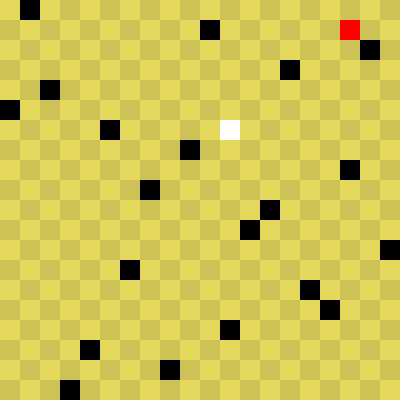


Step 2
Action:  [3]
obs= [[1. 0. 0. 1. 0. 1. 0. 0.]] reward= [0.] done= [False] [{'PosX': 18, 'PosY': 18}]


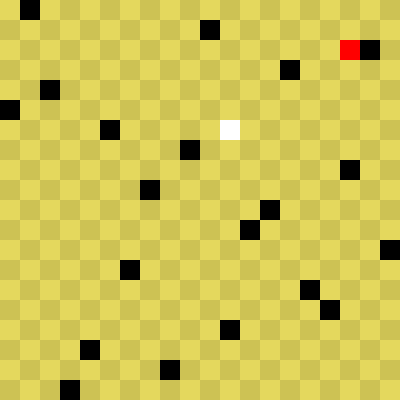


Step 3
Action:  [3]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 18, 'PosY': 17}]


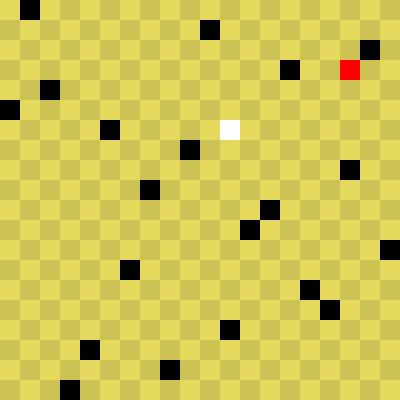


Step 4
Action:  [0]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 17, 'PosY': 17}]


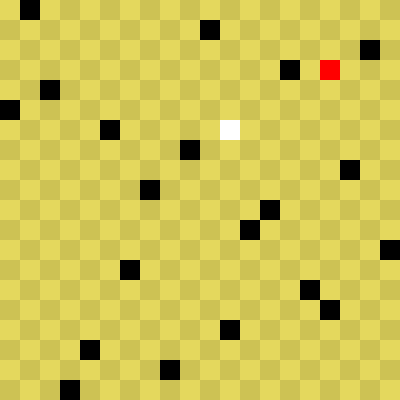


Step 5
Action:  [3]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 17, 'PosY': 16}]


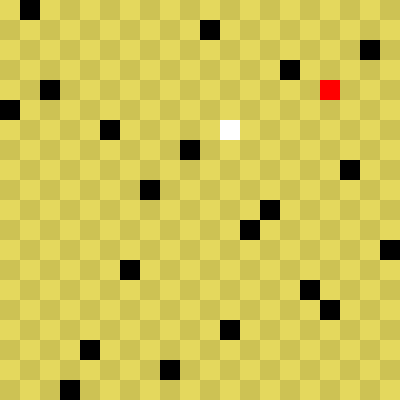


Step 6
Action:  [3]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 17, 'PosY': 15}]


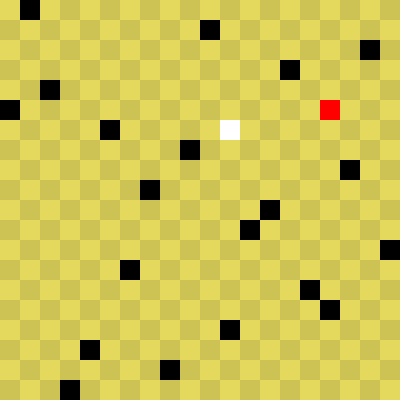


Step 7
Action:  [1]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 18, 'PosY': 15}]


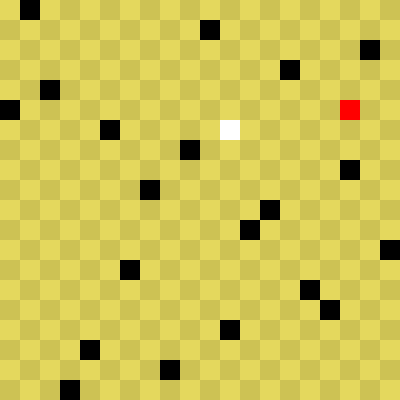


Step 8
Action:  [0]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 17, 'PosY': 15}]


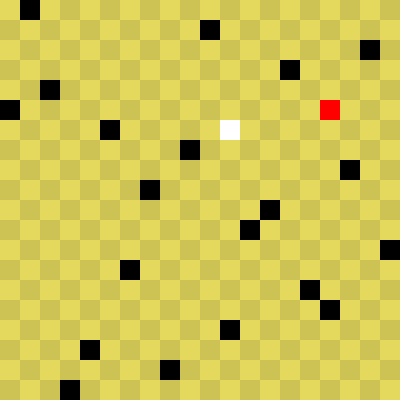


Step 9
Action:  [0]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 16, 'PosY': 15}]


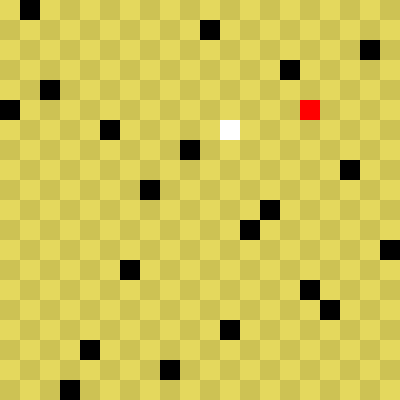


Step 10
Action:  [0]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 15, 'PosY': 15}]


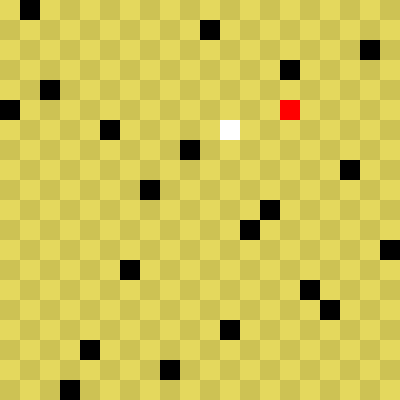


Step 11
Action:  [0]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 14, 'PosY': 15}]


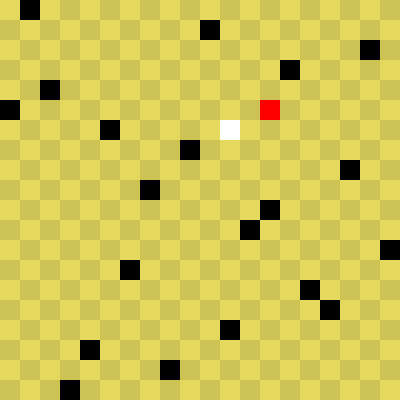


Step 12
Action:  [3]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 14, 'PosY': 14}]


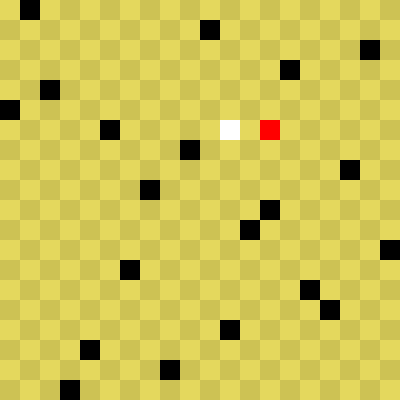


Step 13
Action:  [0]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 13, 'PosY': 14}]


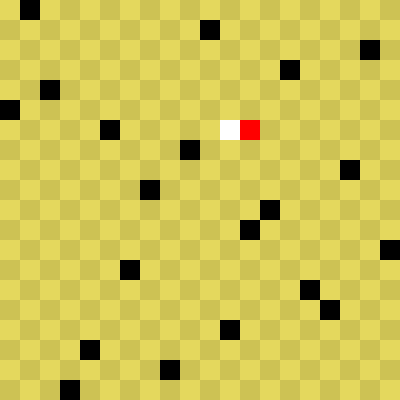


Step 14
Action:  [1]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 14, 'PosY': 14}]


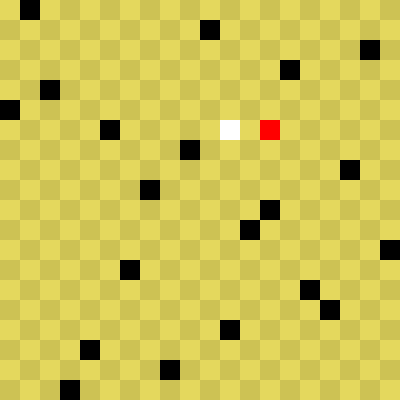


Step 15
Action:  [0]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 13, 'PosY': 14}]


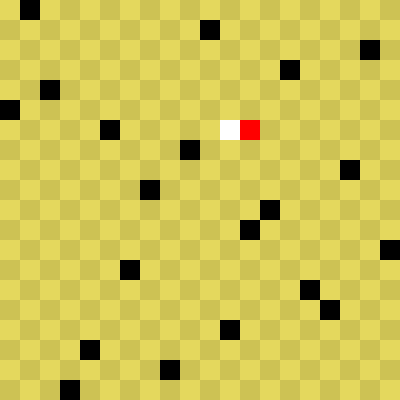


Step 16
Action:  [3]
obs= [[1. 0. 1. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 13, 'PosY': 13}]


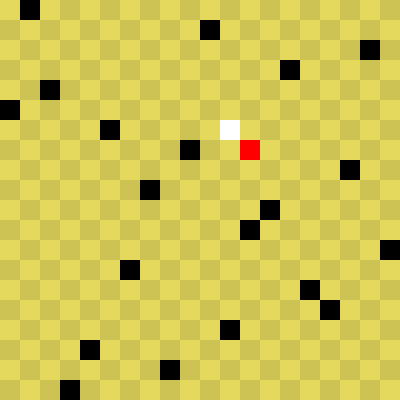


Step 17
Action:  [2]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 13, 'PosY': 14}]


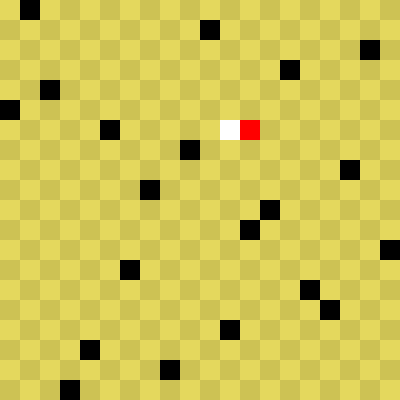


Step 18
Action:  [3]
obs= [[1. 0. 1. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 13, 'PosY': 13}]


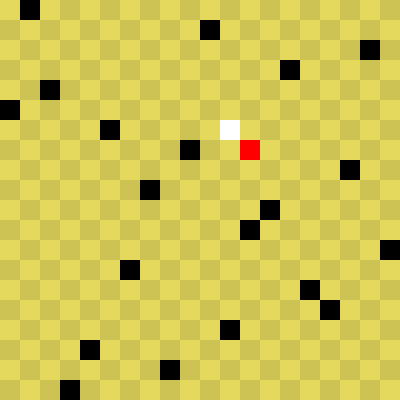


Step 19
Action:  [2]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 13, 'PosY': 14}]


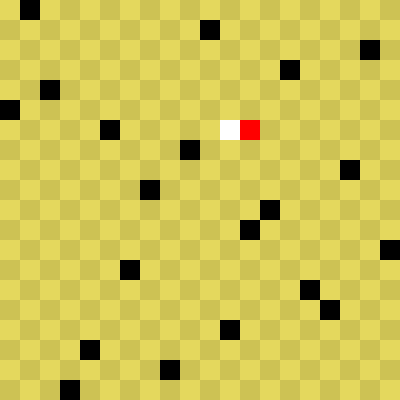


Step 20
Action:  [2]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 13, 'PosY': 15}]


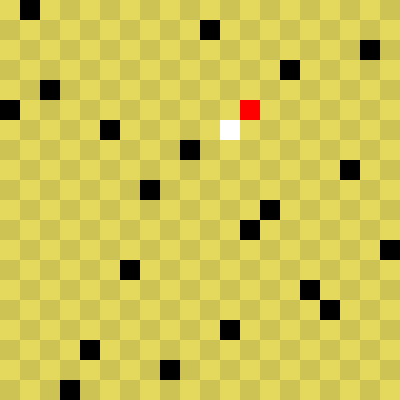


Step 21
Action:  [3]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 13, 'PosY': 14}]


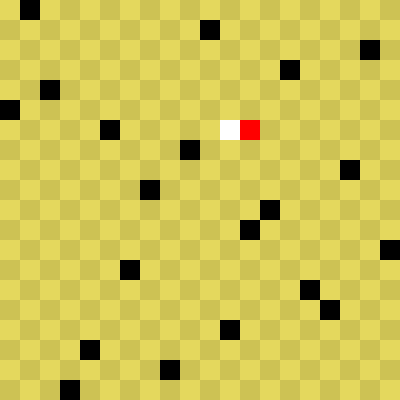


Step 22
Action:  [0]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [22.727272] done= [ True] [{'PosX': 12, 'PosY': 14, 'episode': {'r': 22.727273, 'l': 22, 't': 53.957618}, 'terminal_observation': array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)}]


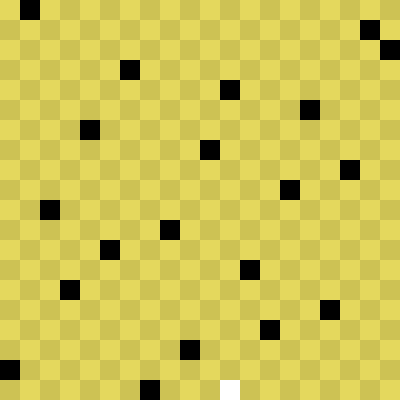


Step 1
Action:  [3]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 19, 'PosY': 18}]


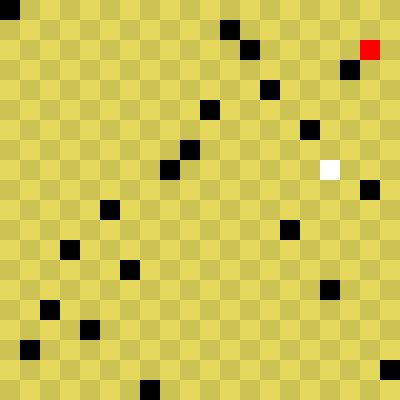


Step 2
Action:  [0]
obs= [[1. 0. 0. 1. 0. 0. 0. 1.]] reward= [0.] done= [False] [{'PosX': 18, 'PosY': 18}]


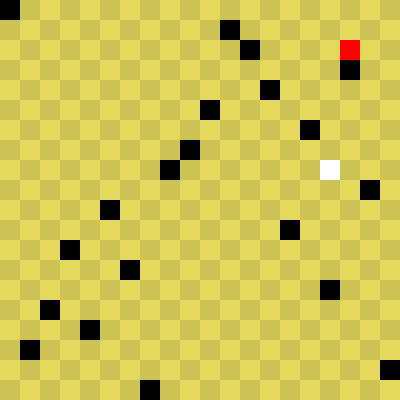


Step 3
Action:  [0]
obs= [[0. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 17, 'PosY': 18}]


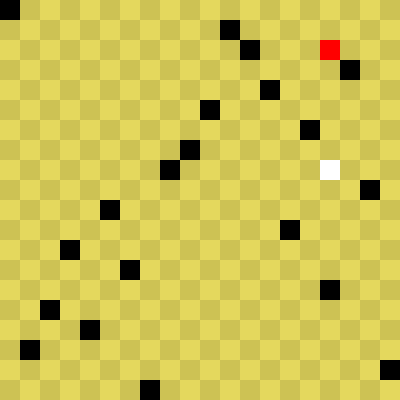


Step 4
Action:  [2]
obs= [[0. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 17, 'PosY': 19}]


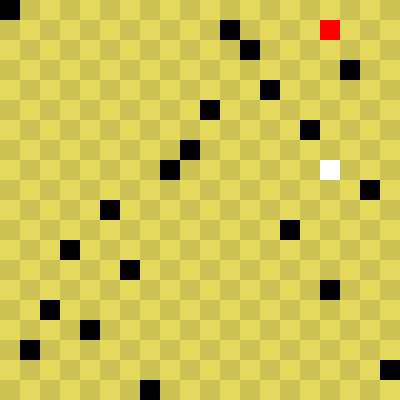


Step 5
Action:  [0]
obs= [[0. 1. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 16, 'PosY': 19}]


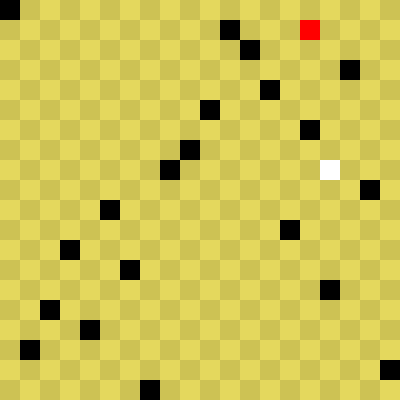


Step 6
Action:  [3]
obs= [[0. 1. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 16, 'PosY': 18}]


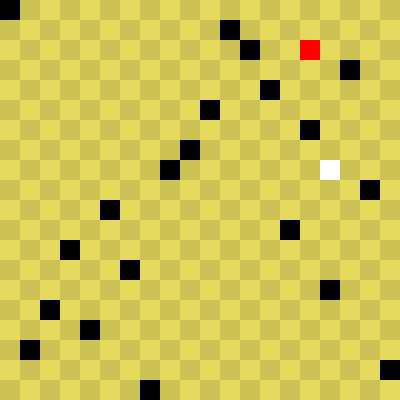


Step 7
Action:  [1]
obs= [[0. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 17, 'PosY': 18}]


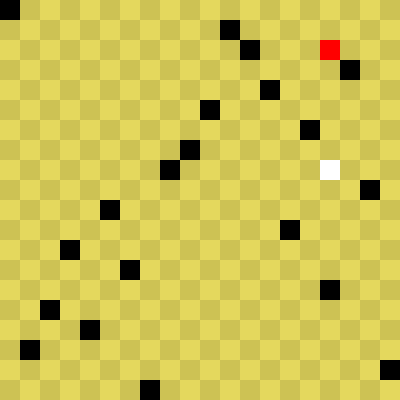


Step 8
Action:  [0]
obs= [[0. 1. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 16, 'PosY': 18}]


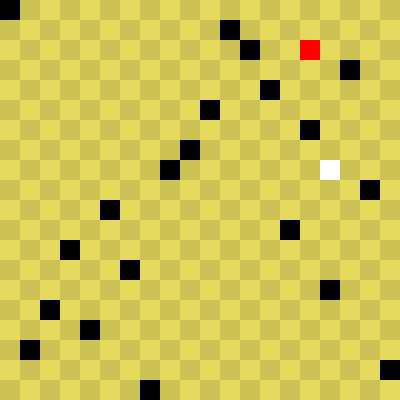


Step 9
Action:  [2]
obs= [[0. 1. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 16, 'PosY': 19}]


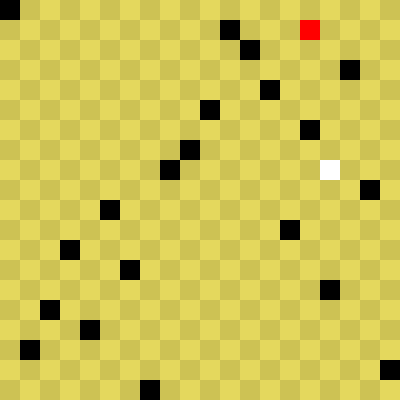


Step 10
Action:  [0]
obs= [[0. 1. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 15, 'PosY': 19}]


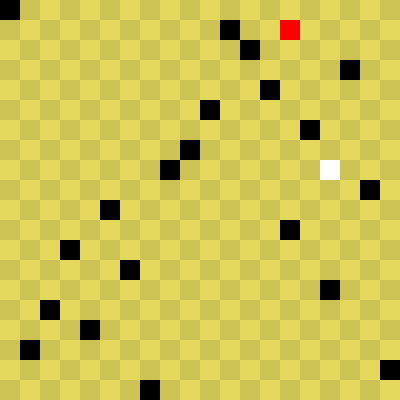


Step 11
Action:  [3]
obs= [[0. 1. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 15, 'PosY': 18}]


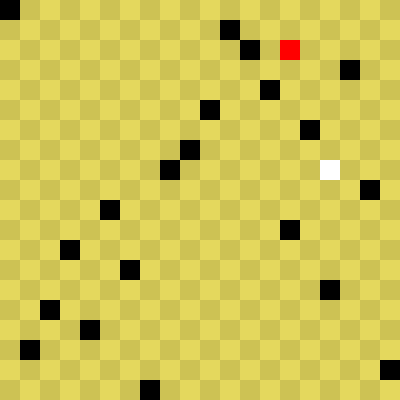


Step 12
Action:  [1]
obs= [[0. 1. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 16, 'PosY': 18}]


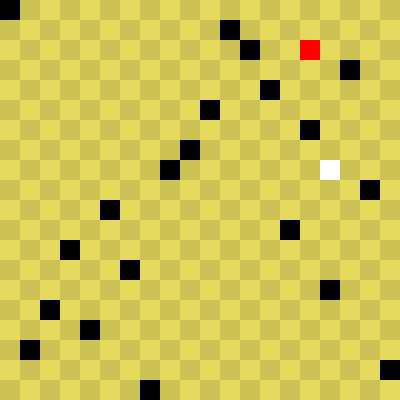


Step 13
Action:  [3]
obs= [[0. 1. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 16, 'PosY': 17}]


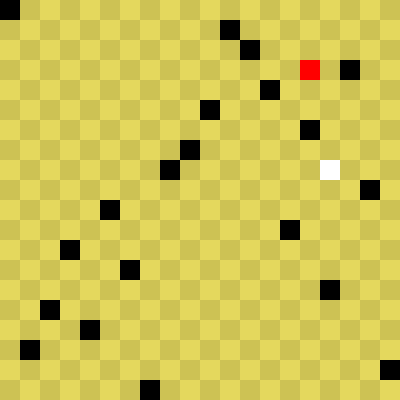


Step 14
Action:  [1]
obs= [[0. 0. 0. 1. 0. 1. 0. 0.]] reward= [0.] done= [False] [{'PosX': 17, 'PosY': 17}]


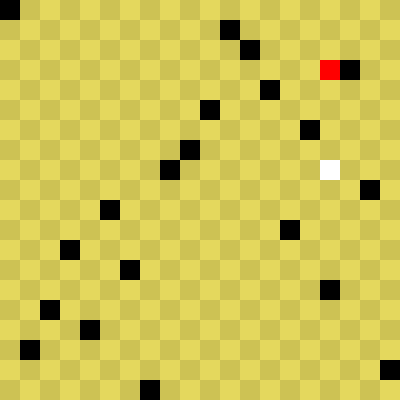


Step 15
Action:  [3]
obs= [[0. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 17, 'PosY': 16}]


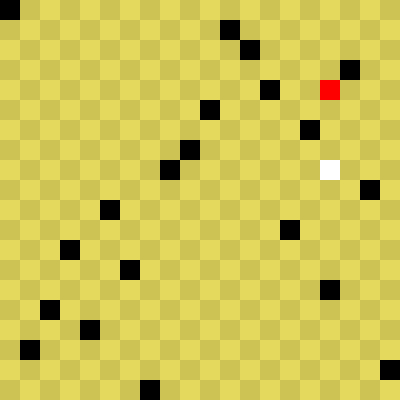


Step 16
Action:  [3]
obs= [[0. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 17, 'PosY': 15}]


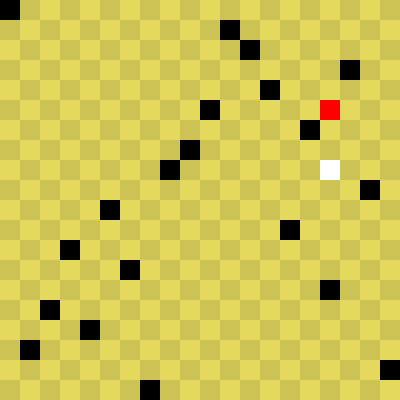


Step 17
Action:  [3]
obs= [[0. 0. 0. 1. 1. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 17, 'PosY': 14}]


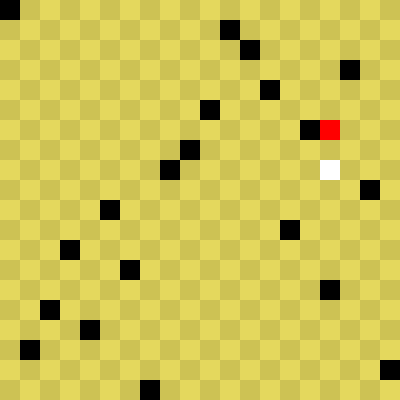


Step 18
Action:  [2]
obs= [[0. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 17, 'PosY': 15}]


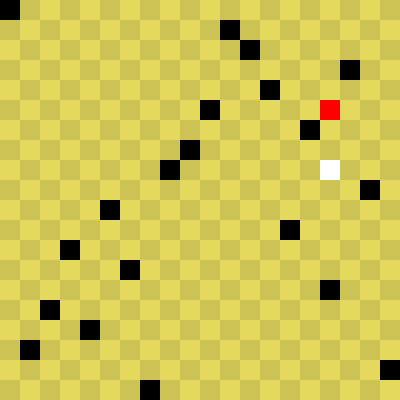


Step 19
Action:  [0]
obs= [[0. 1. 0. 1. 0. 0. 0. 1.]] reward= [0.] done= [False] [{'PosX': 16, 'PosY': 15}]


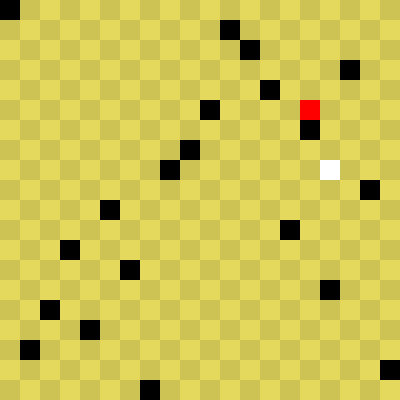


Step 20
Action:  [1]
obs= [[0. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 17, 'PosY': 15}]


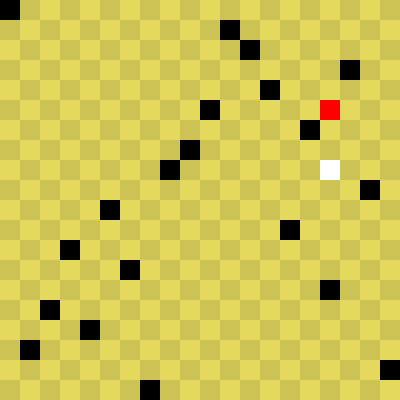


Step 21
Action:  [2]
obs= [[0. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 17, 'PosY': 16}]


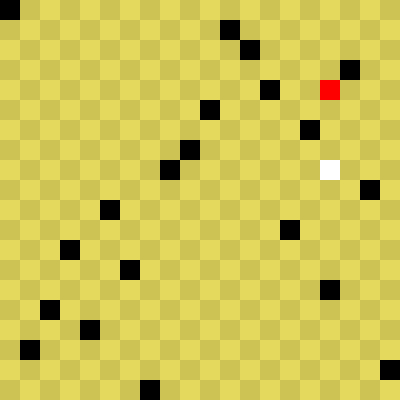


Step 22
Action:  [3]
obs= [[0. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 17, 'PosY': 15}]


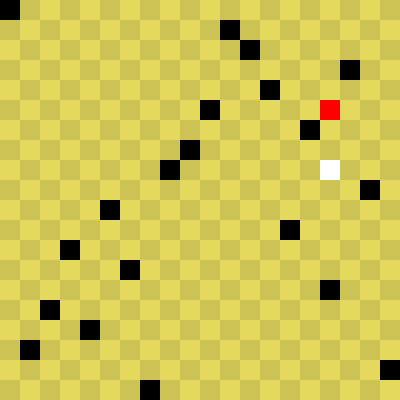


Step 23
Action:  [1]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 18, 'PosY': 15}]


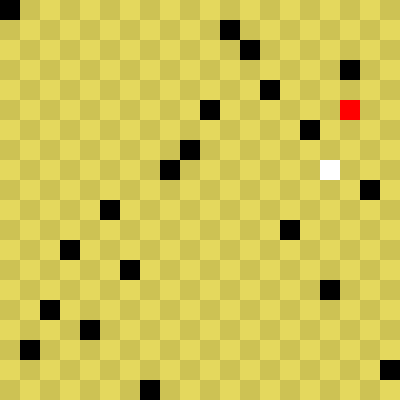


Step 24
Action:  [0]
obs= [[0. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 17, 'PosY': 15}]


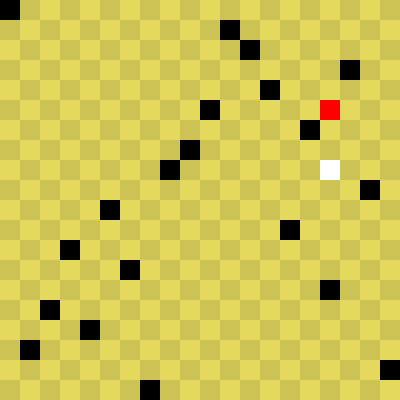


Step 25
Action:  [3]
obs= [[0. 0. 0. 1. 1. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 17, 'PosY': 14}]


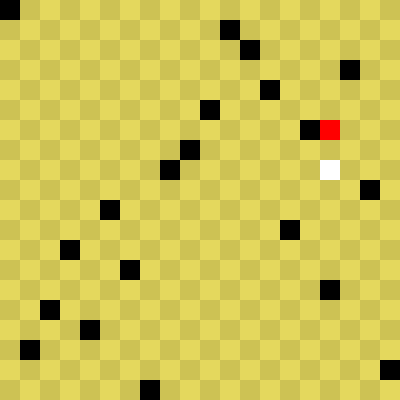


Step 26
Action:  [3]
obs= [[0. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 17, 'PosY': 13}]


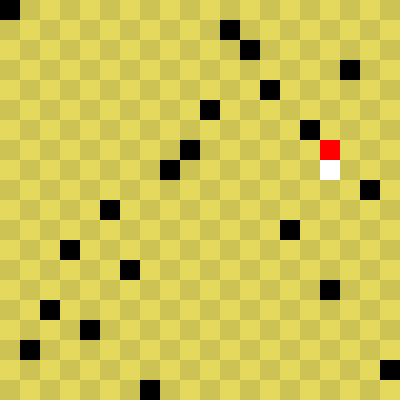


Step 27
Action:  [3]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [18.518518] done= [ True] [{'PosX': 17, 'PosY': 12, 'episode': {'r': 18.518519, 'l': 27, 't': 61.475881}, 'terminal_observation': array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)}]


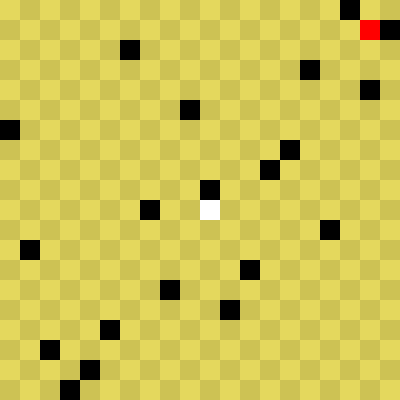


Step 1
Action:  [3]
obs= [[1. 0. 0. 1. 0. 1. 0. 0.]] reward= [0.] done= [False] [{'PosX': 19, 'PosY': 18}]


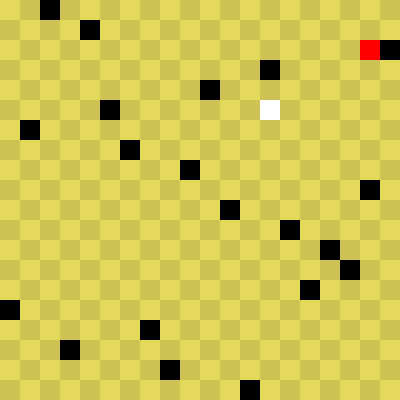


Step 2
Action:  [3]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 19, 'PosY': 17}]


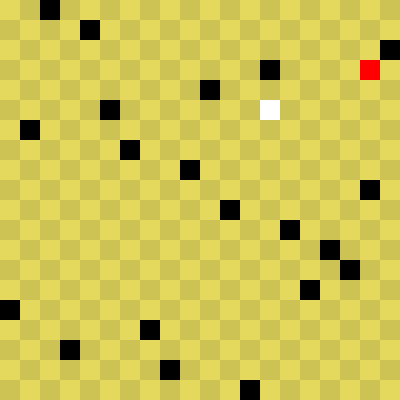


Step 3
Action:  [1]
obs= [[1. 0. 0. 1. 0. 0. 1. 0.]] reward= [0.] done= [False] [{'PosX': 20, 'PosY': 17}]


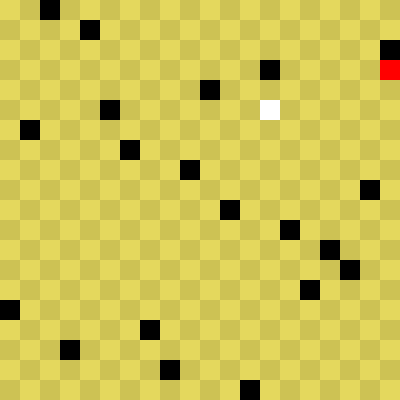


Step 4
Action:  [2]
obs= [[1. 0. 0. 1. 0. 0. 1. 0.]] reward= [0.] done= [False] [{'PosX': 20, 'PosY': 17}]


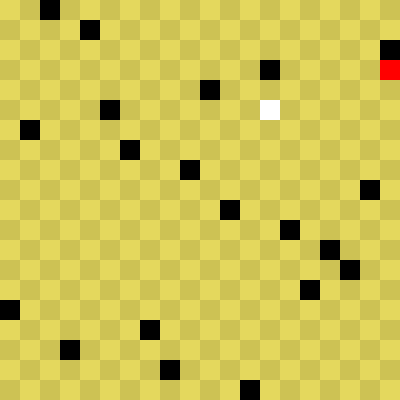


Step 5
Action:  [3]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 20, 'PosY': 16}]


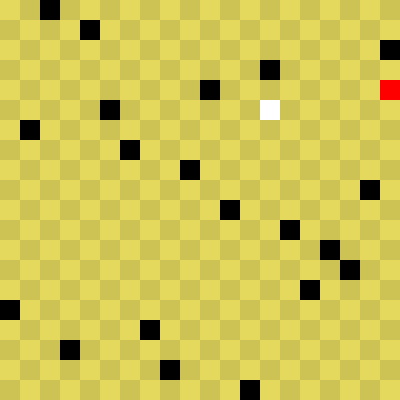


Step 6
Action:  [2]
obs= [[1. 0. 0. 1. 0. 0. 1. 0.]] reward= [0.] done= [False] [{'PosX': 20, 'PosY': 17}]


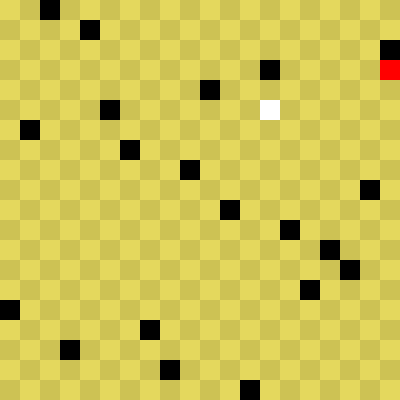


Step 7
Action:  [2]
obs= [[1. 0. 0. 1. 0. 0. 1. 0.]] reward= [0.] done= [False] [{'PosX': 20, 'PosY': 17}]


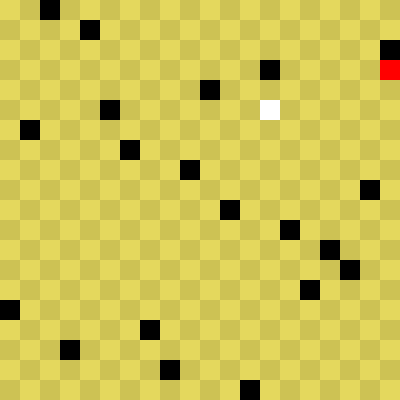


Step 8
Action:  [1]
obs= [[1. 0. 0. 1. 0. 1. 1. 0.]] reward= [0.] done= [False] [{'PosX': 20, 'PosY': 17}]


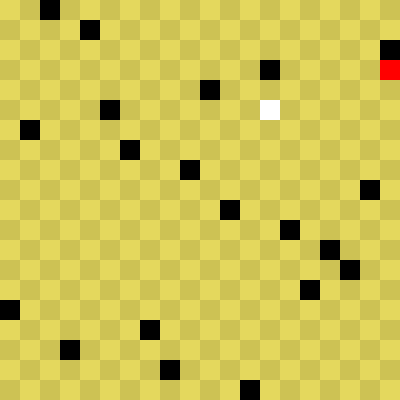


Step 9
Action:  [3]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 20, 'PosY': 16}]


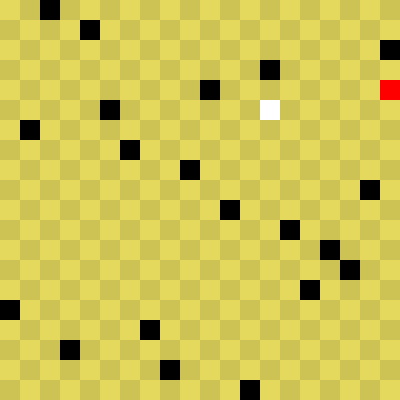


Step 10
Action:  [3]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 20, 'PosY': 15}]


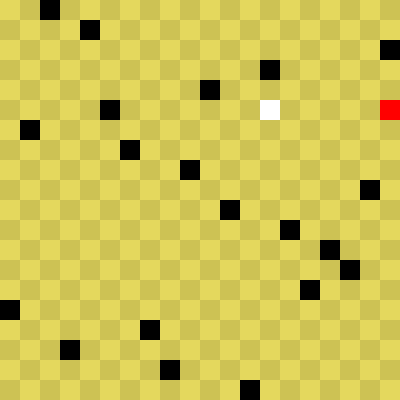


Step 11
Action:  [3]
obs= [[1. 0. 1. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 20, 'PosY': 14}]


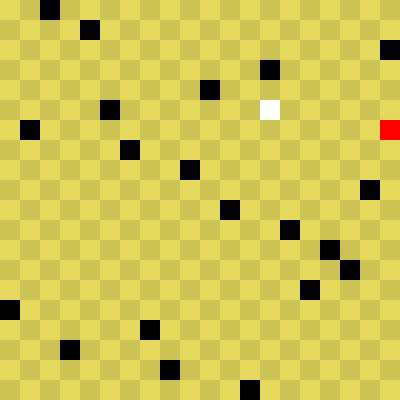


Step 12
Action:  [1]
obs= [[1. 0. 1. 0. 0. 1. 0. 0.]] reward= [0.] done= [False] [{'PosX': 20, 'PosY': 14}]


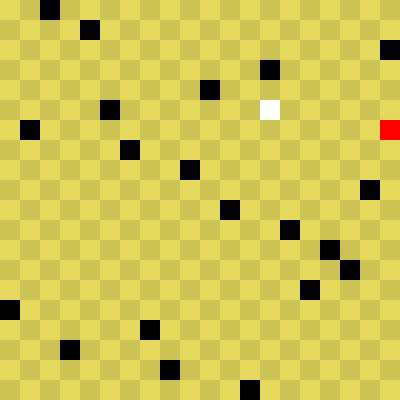


Step 13
Action:  [0]
obs= [[1. 0. 1. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 19, 'PosY': 14}]


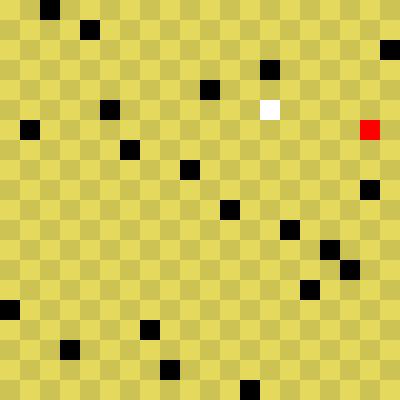


Step 14
Action:  [0]
obs= [[1. 0. 1. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 18, 'PosY': 14}]


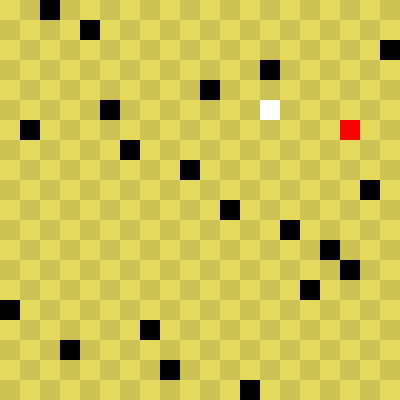


Step 15
Action:  [1]
obs= [[1. 0. 1. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 19, 'PosY': 14}]


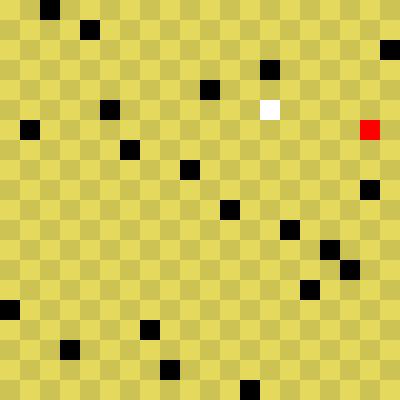


Step 16
Action:  [2]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 19, 'PosY': 15}]


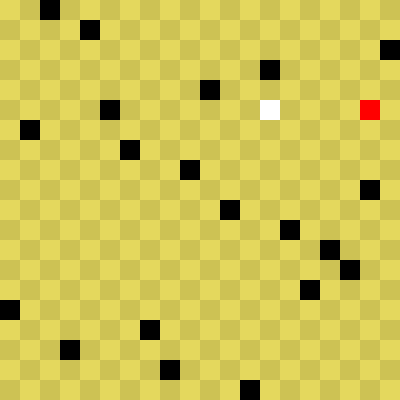


Step 17
Action:  [0]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 18, 'PosY': 15}]


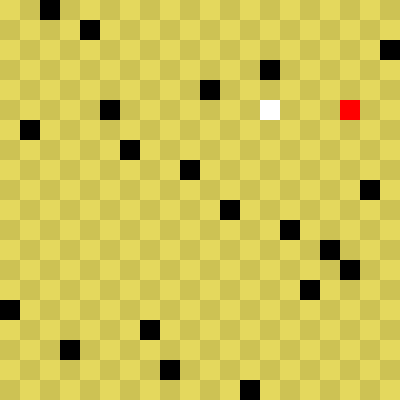


Step 18
Action:  [1]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 19, 'PosY': 15}]


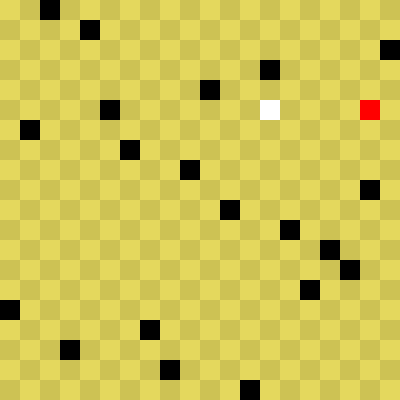


Step 19
Action:  [3]
obs= [[1. 0. 1. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 19, 'PosY': 14}]


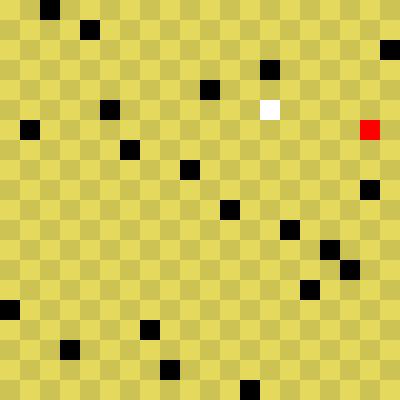


Step 20
Action:  [2]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 19, 'PosY': 15}]


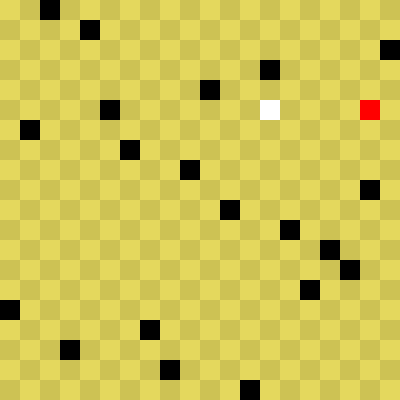


Step 21
Action:  [1]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 20, 'PosY': 15}]


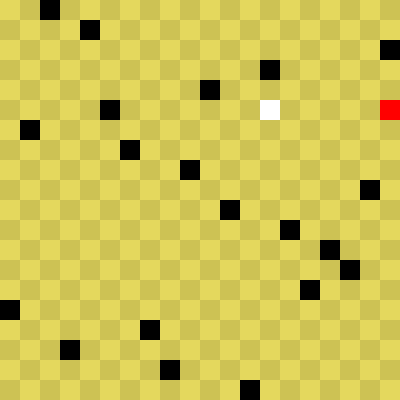


Step 22
Action:  [0]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 19, 'PosY': 15}]


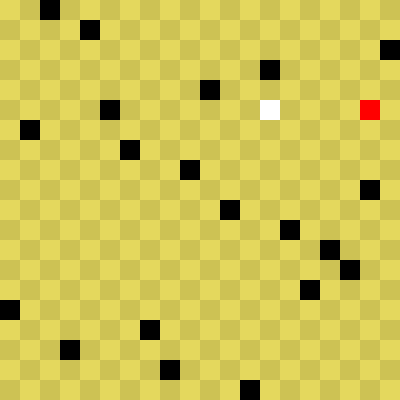


Step 23
Action:  [0]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 18, 'PosY': 15}]


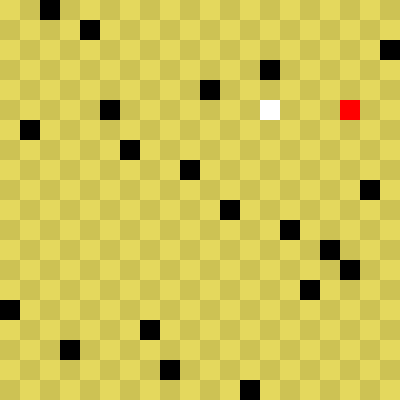


Step 24
Action:  [1]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 19, 'PosY': 15}]


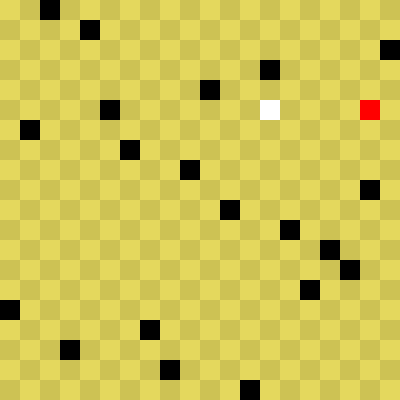


Step 25
Action:  [0]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 18, 'PosY': 15}]


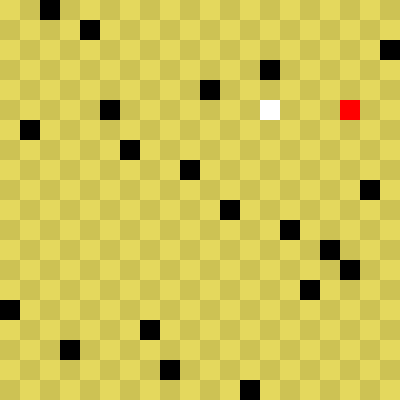


Step 26
Action:  [1]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 19, 'PosY': 15}]


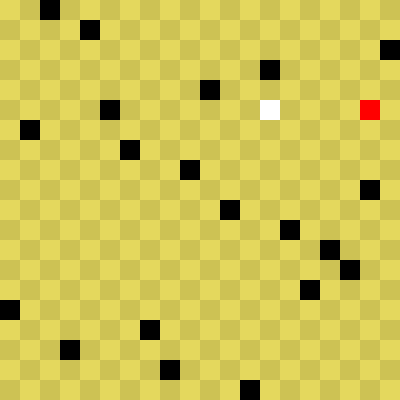


Step 27
Action:  [1]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 20, 'PosY': 15}]


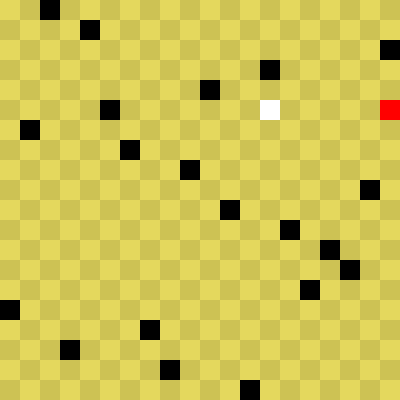


Step 28
Action:  [1]
obs= [[1. 0. 0. 0. 0. 1. 0. 0.]] reward= [0.] done= [False] [{'PosX': 20, 'PosY': 15}]


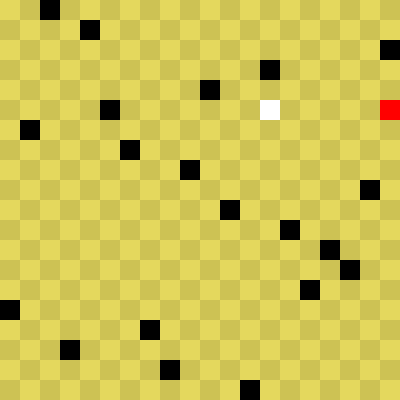


Step 29
Action:  [3]
obs= [[1. 0. 1. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 20, 'PosY': 14}]


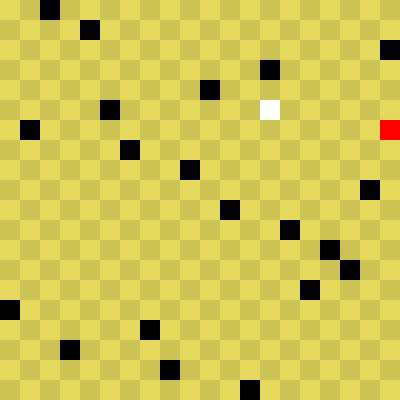


Step 30
Action:  [0]
obs= [[1. 0. 1. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 19, 'PosY': 14}]


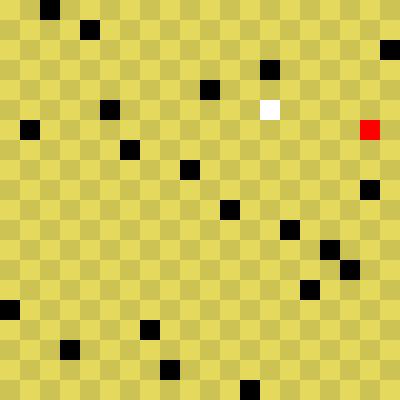


Step 31
Action:  [3]
obs= [[1. 0. 1. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 19, 'PosY': 13}]


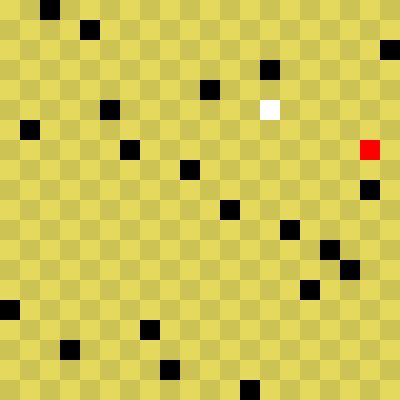


Step 32
Action:  [2]
obs= [[1. 0. 1. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 19, 'PosY': 14}]


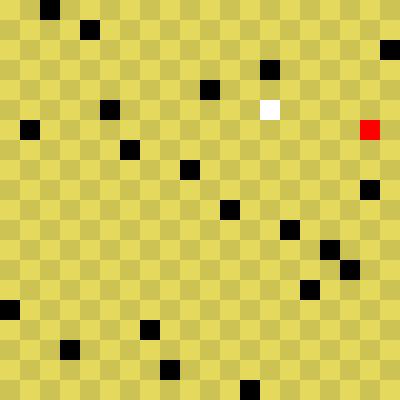


Step 33
Action:  [2]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 19, 'PosY': 15}]


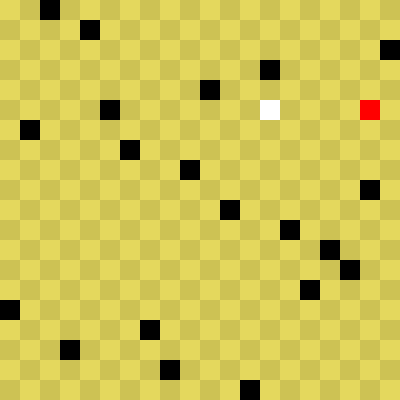


Step 34
Action:  [0]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 18, 'PosY': 15}]


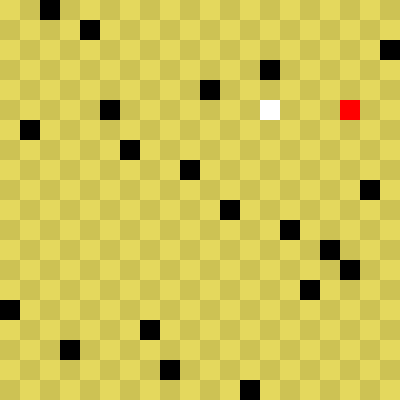


Step 35
Action:  [0]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 17, 'PosY': 15}]


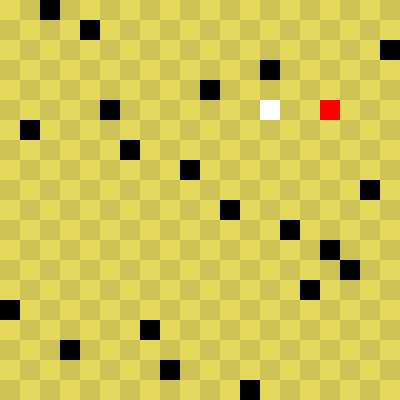


Step 36
Action:  [3]
obs= [[1. 0. 1. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 17, 'PosY': 14}]


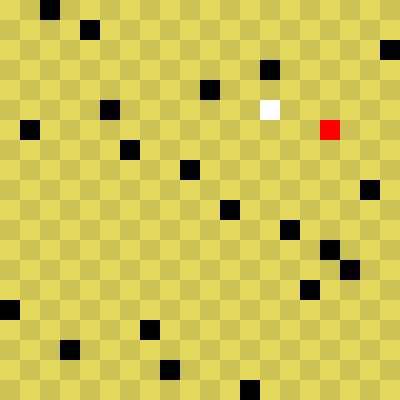


Step 37
Action:  [3]
obs= [[1. 0. 1. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 17, 'PosY': 13}]


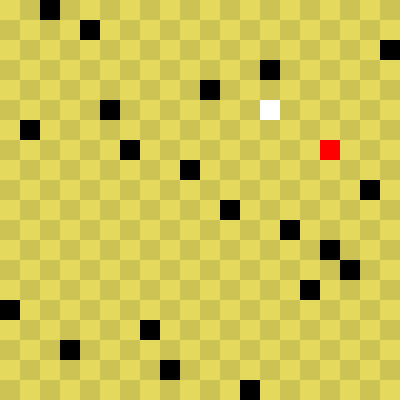


Step 38
Action:  [2]
obs= [[1. 0. 1. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 17, 'PosY': 14}]


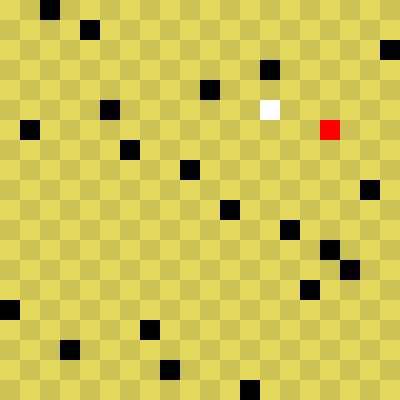


Step 39
Action:  [2]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 17, 'PosY': 15}]


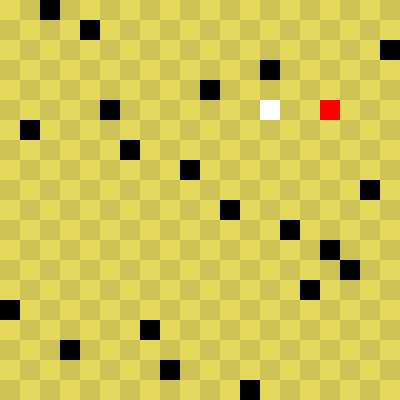


Step 40
Action:  [0]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 16, 'PosY': 15}]


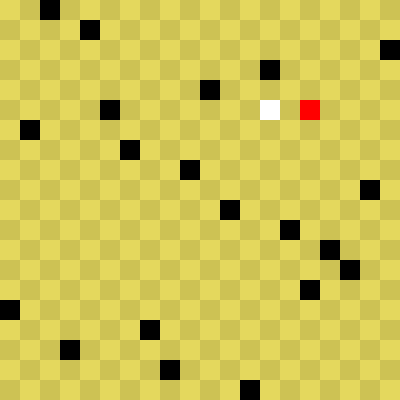


Step 1
Action:  [3]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 19, 'PosY': 18}]


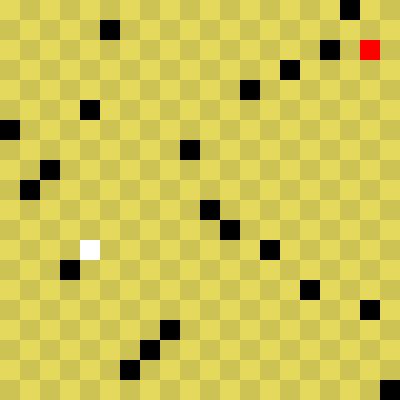


Step 2
Action:  [3]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 19, 'PosY': 17}]


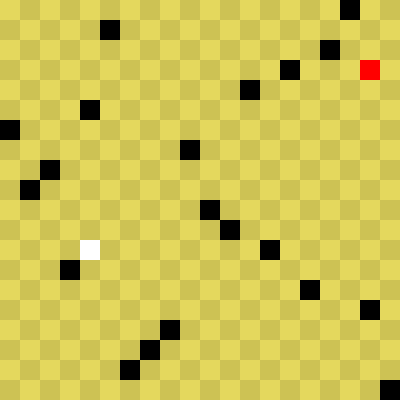


Step 3
Action:  [0]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 18, 'PosY': 17}]


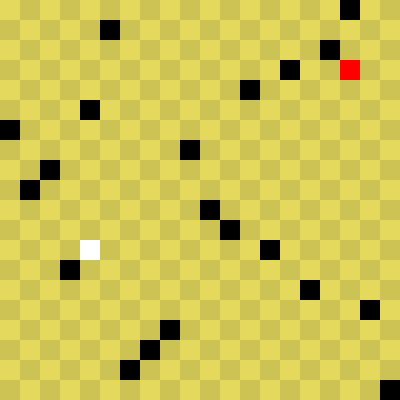


Step 4
Action:  [3]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 18, 'PosY': 16}]


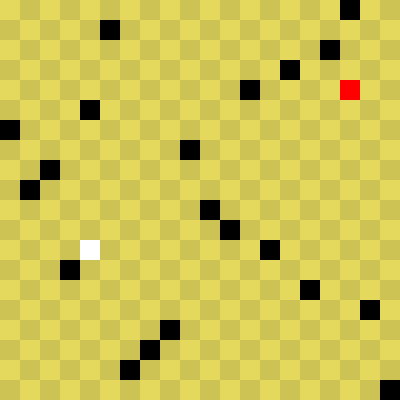


Step 5
Action:  [0]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 17, 'PosY': 16}]


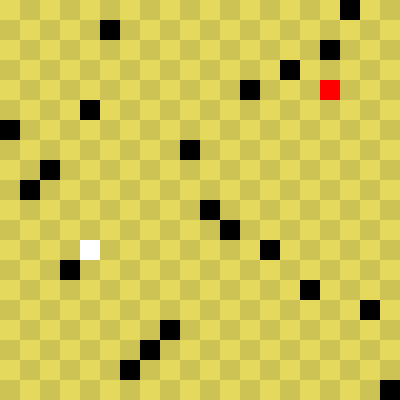


Step 6
Action:  [3]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 17, 'PosY': 15}]


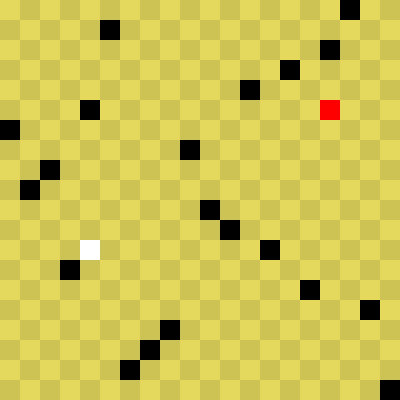


Step 7
Action:  [3]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 17, 'PosY': 14}]


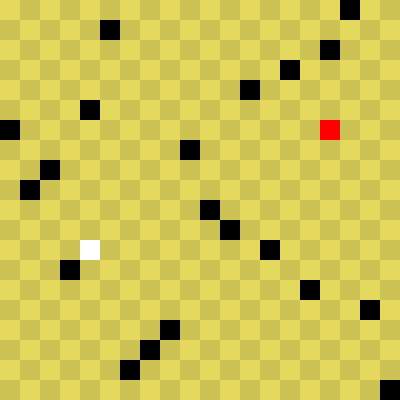


Step 8
Action:  [0]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 16, 'PosY': 14}]


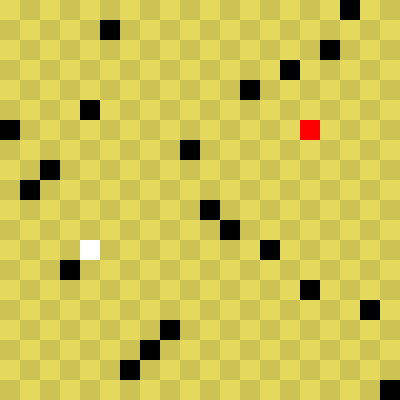


Step 9
Action:  [3]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 16, 'PosY': 13}]


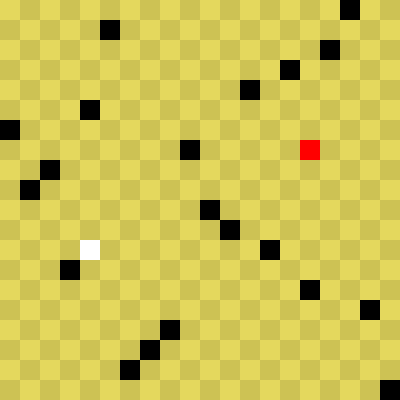


Step 10
Action:  [2]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 16, 'PosY': 14}]


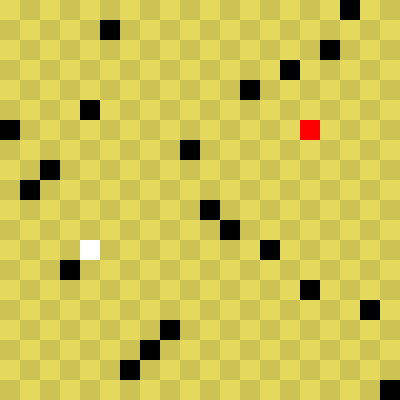


Step 11
Action:  [3]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 16, 'PosY': 13}]


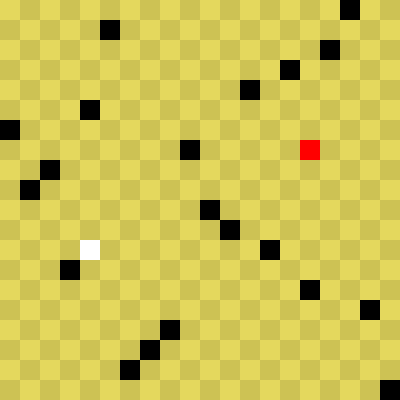


Step 12
Action:  [0]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 15, 'PosY': 13}]


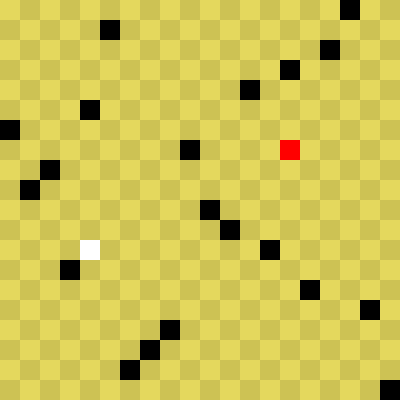


Step 13
Action:  [3]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 15, 'PosY': 12}]


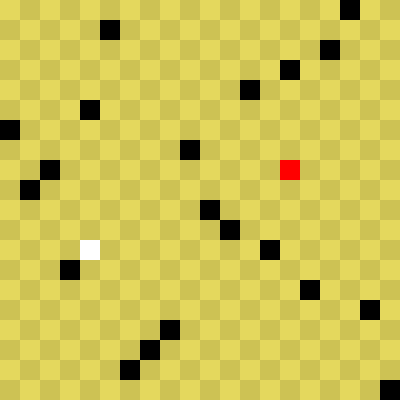


Step 14
Action:  [0]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 14, 'PosY': 12}]


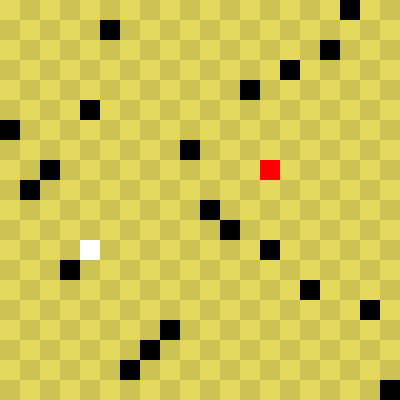


Step 15
Action:  [0]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 13, 'PosY': 12}]


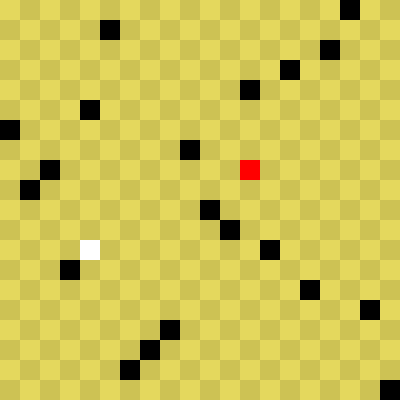


Step 16
Action:  [0]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 12, 'PosY': 12}]


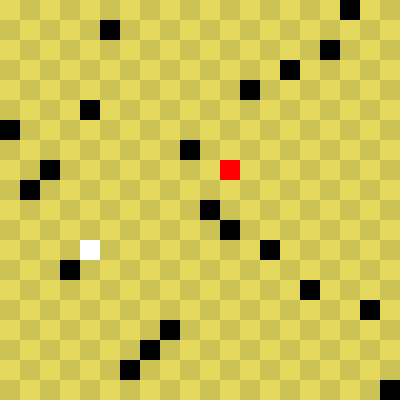


Step 17
Action:  [0]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 11, 'PosY': 12}]


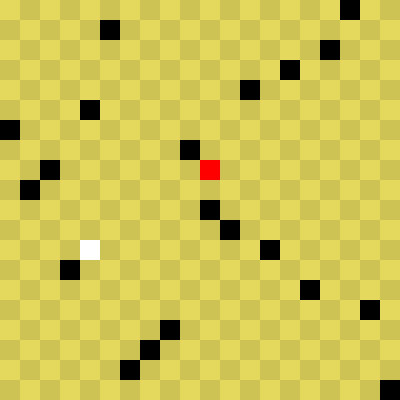


Step 18
Action:  [2]
obs= [[1. 0. 0. 1. 1. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 11, 'PosY': 13}]


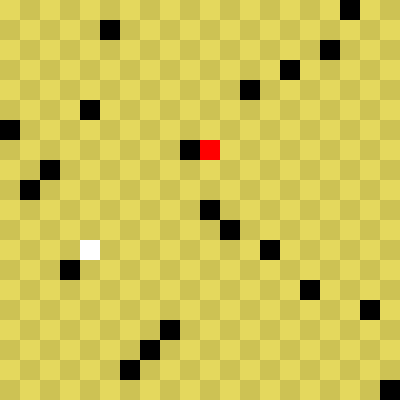


Step 19
Action:  [0]
obs= [[1. 0. 0. 1. 1. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 11, 'PosY': 13}]


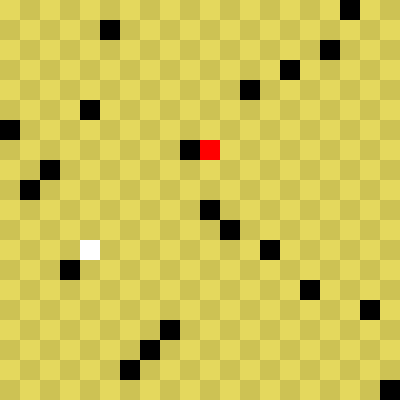


Step 20
Action:  [0]
obs= [[1. 0. 0. 1. 1. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 11, 'PosY': 13}]


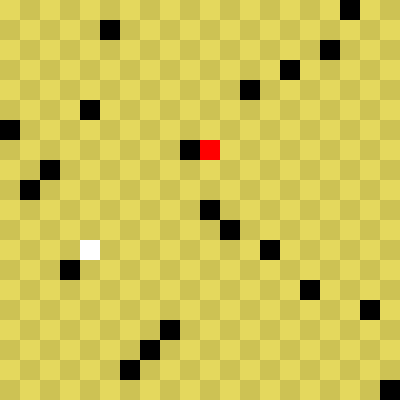


Step 21
Action:  [3]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 11, 'PosY': 12}]


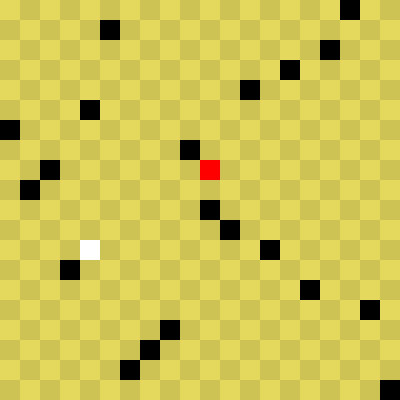


Step 22
Action:  [0]
obs= [[1. 0. 0. 1. 0. 0. 1. 0.]] reward= [0.] done= [False] [{'PosX': 10, 'PosY': 12}]


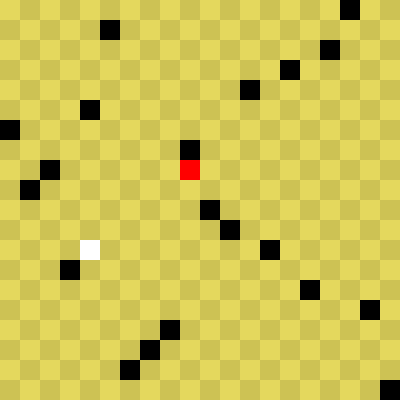


Step 23
Action:  [3]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 10, 'PosY': 11}]


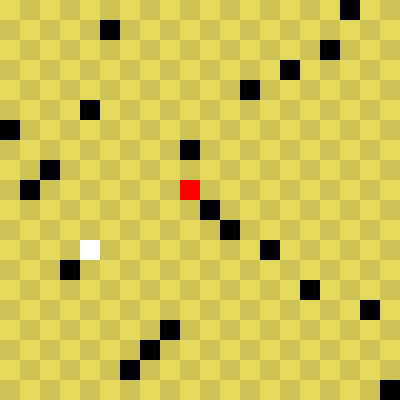


Step 24
Action:  [3]
obs= [[1. 0. 0. 1. 0. 1. 0. 0.]] reward= [0.] done= [False] [{'PosX': 10, 'PosY': 10}]


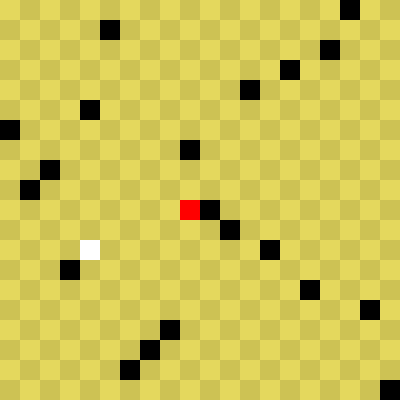


Step 25
Action:  [3]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 10, 'PosY': 9}]


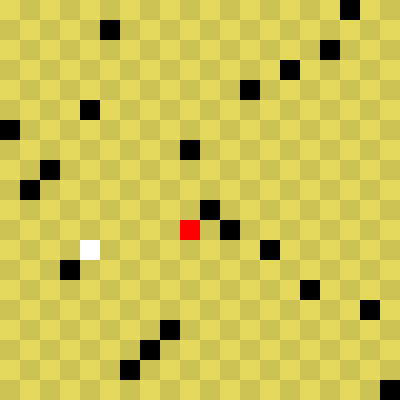


Step 26
Action:  [3]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 10, 'PosY': 8}]


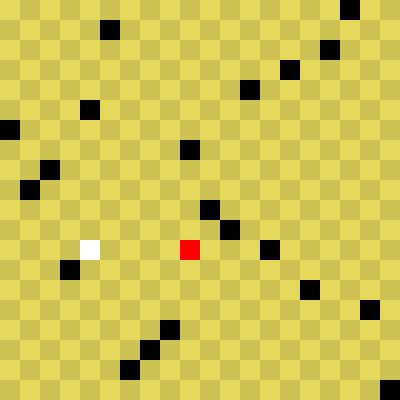


Step 27
Action:  [0]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 9, 'PosY': 8}]


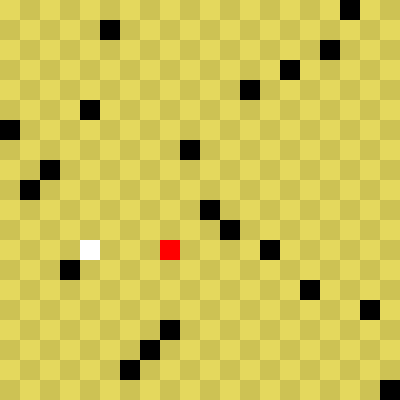


Step 28
Action:  [3]
obs= [[1. 0. 1. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 9, 'PosY': 7}]


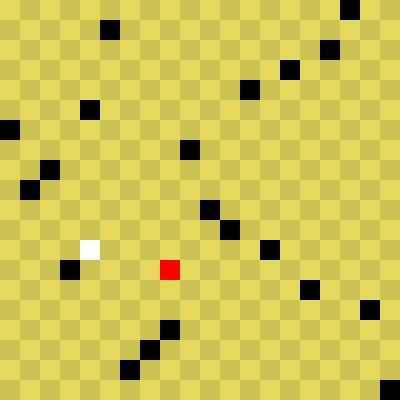


Step 29
Action:  [2]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 9, 'PosY': 8}]


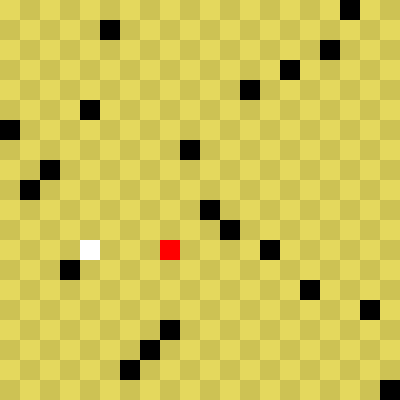


Step 30
Action:  [3]
obs= [[1. 0. 1. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 9, 'PosY': 7}]


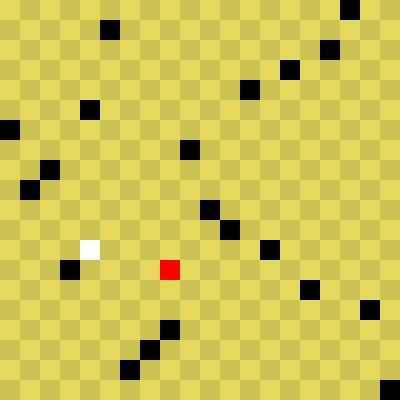


Step 31
Action:  [2]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 9, 'PosY': 8}]


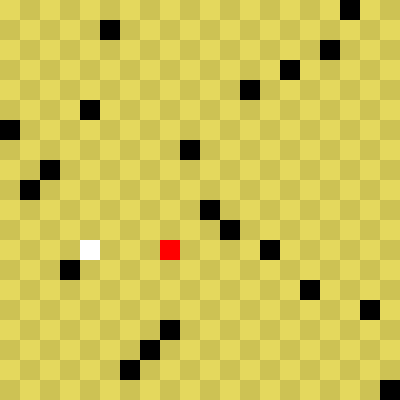


Step 32
Action:  [2]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 9, 'PosY': 9}]


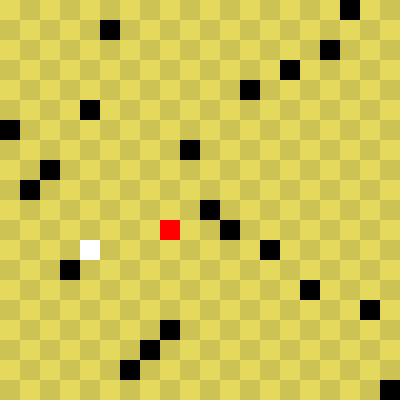


Step 33
Action:  [3]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 9, 'PosY': 8}]


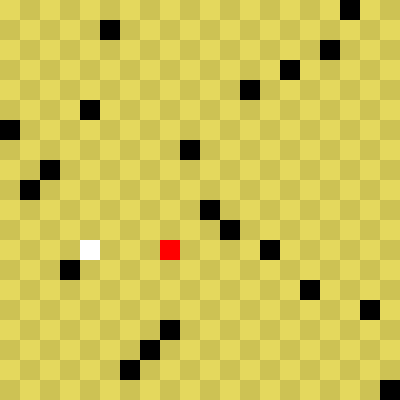


Step 34
Action:  [1]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 10, 'PosY': 8}]


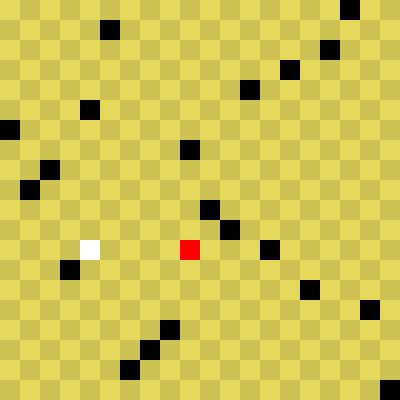


Step 35
Action:  [0]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 9, 'PosY': 8}]


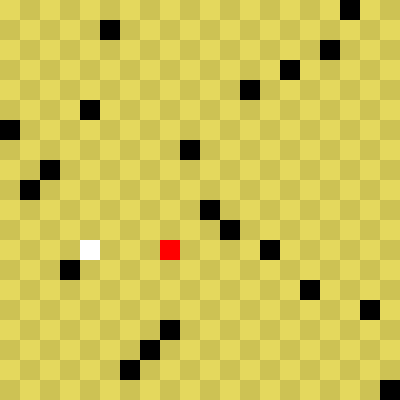


Step 36
Action:  [0]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 8, 'PosY': 8}]


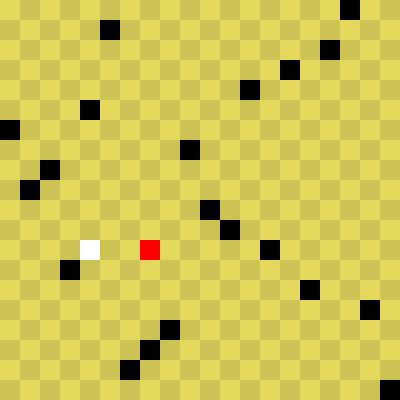


Step 37
Action:  [0]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 7, 'PosY': 8}]


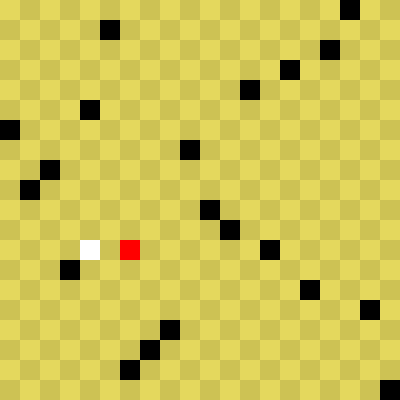


Step 38
Action:  [1]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 8, 'PosY': 8}]


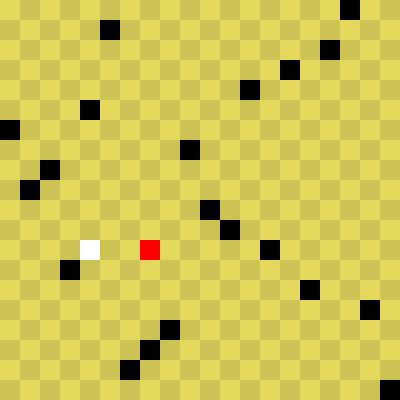


Step 39
Action:  [0]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 7, 'PosY': 8}]


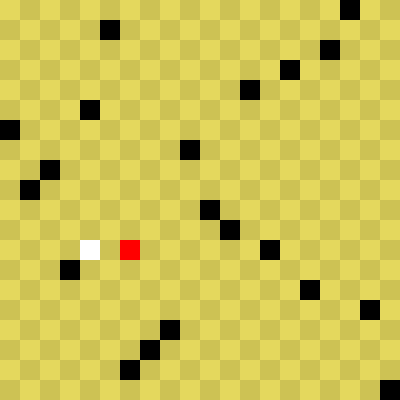


Step 40
Action:  [0]
obs= [[1. 0. 0. 0. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 6, 'PosY': 8}]


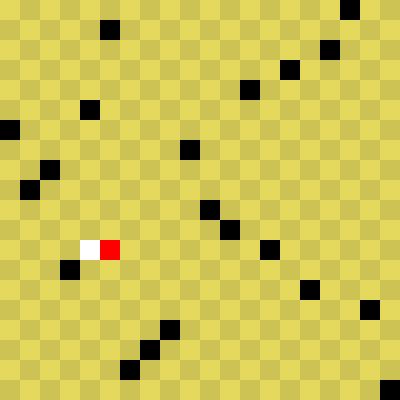


Step 1
Action:  [3]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 19, 'PosY': 18}]


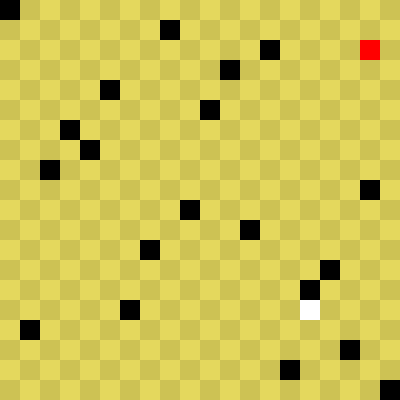


Step 2
Action:  [3]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 19, 'PosY': 17}]


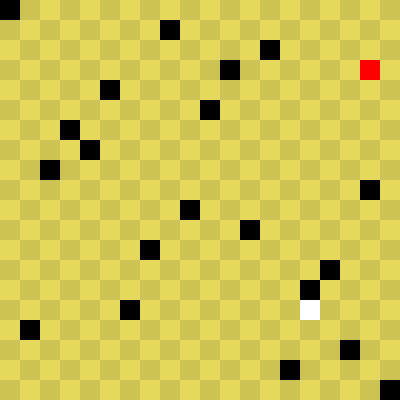


Step 3
Action:  [3]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 19, 'PosY': 16}]


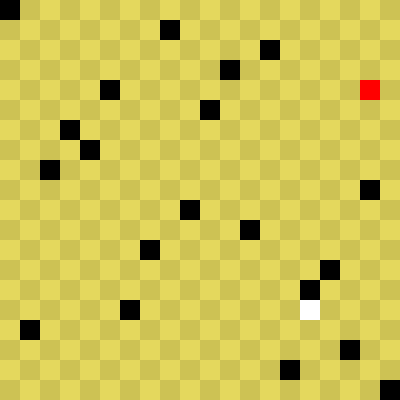


Step 4
Action:  [1]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 20, 'PosY': 16}]


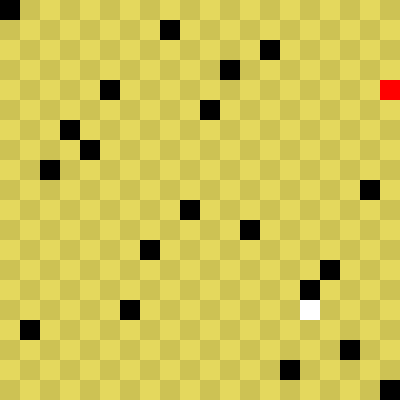


Step 5
Action:  [0]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 19, 'PosY': 16}]


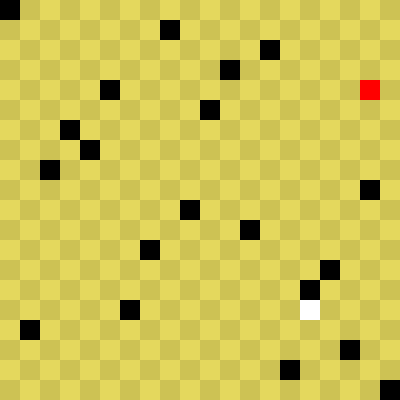


Step 6
Action:  [3]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 19, 'PosY': 15}]


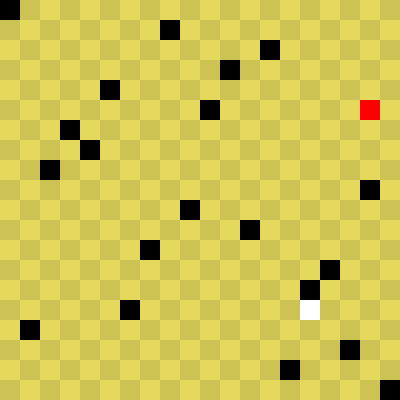


Step 7
Action:  [3]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 19, 'PosY': 14}]


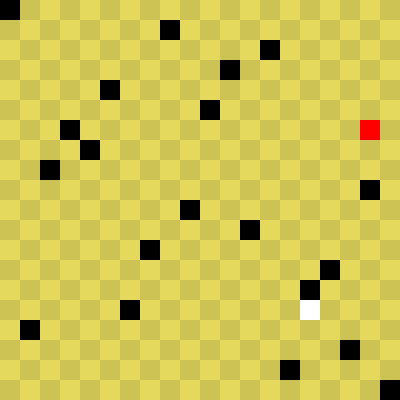


Step 8
Action:  [0]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 18, 'PosY': 14}]


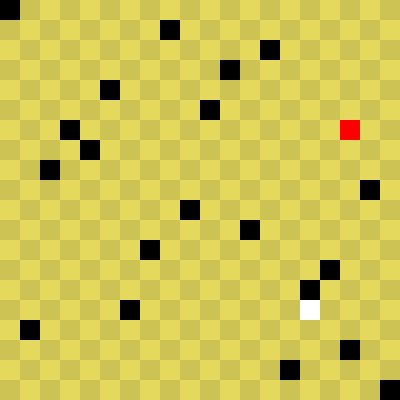


Step 9
Action:  [0]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 17, 'PosY': 14}]


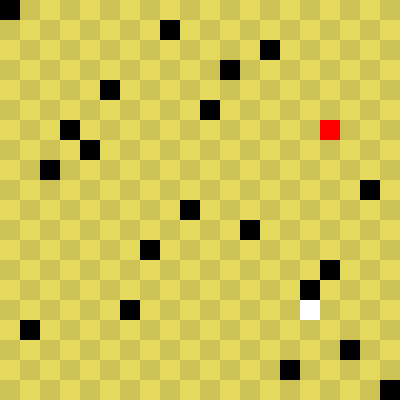


Step 10
Action:  [3]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 17, 'PosY': 13}]


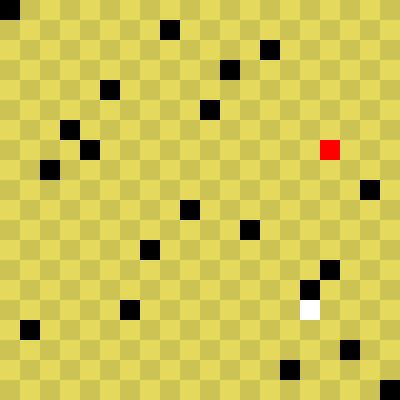


Step 11
Action:  [3]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 17, 'PosY': 12}]


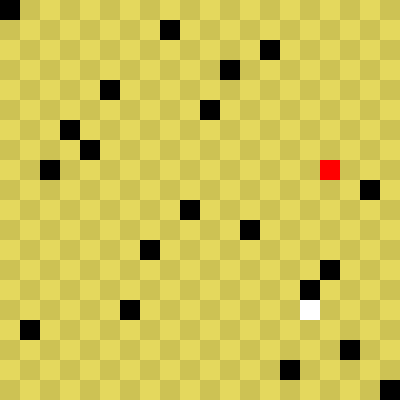


Step 12
Action:  [3]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 17, 'PosY': 11}]


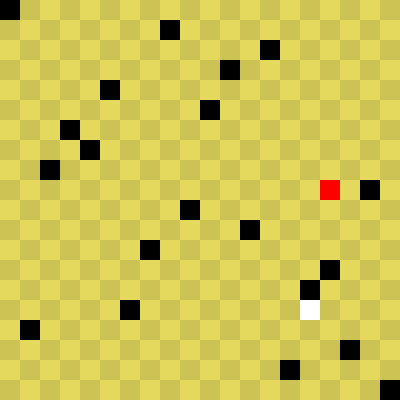


Step 13
Action:  [3]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 17, 'PosY': 10}]


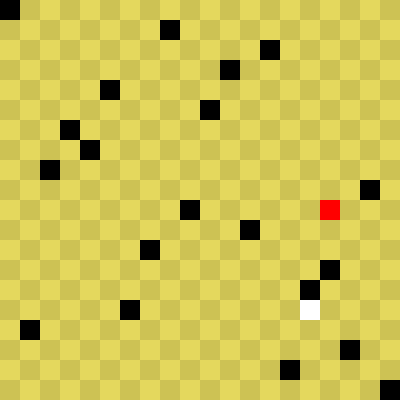


Step 14
Action:  [0]
obs= [[0. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 16, 'PosY': 10}]


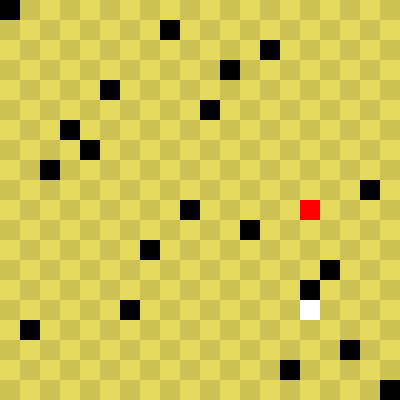


Step 15
Action:  [2]
obs= [[0. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 16, 'PosY': 11}]


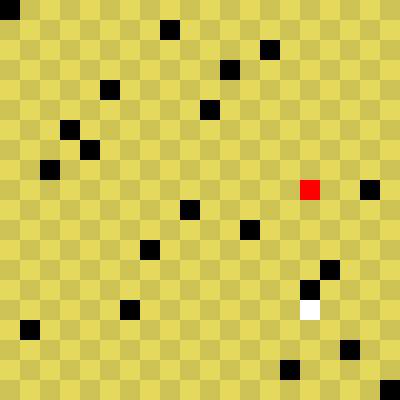


Step 16
Action:  [3]
obs= [[0. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 16, 'PosY': 10}]


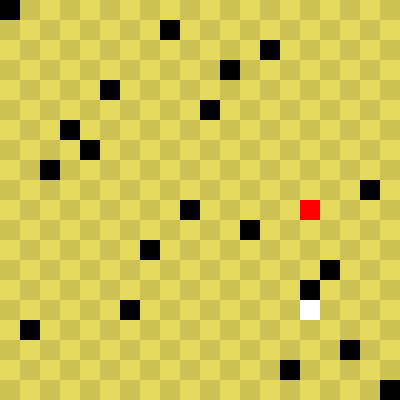


Step 17
Action:  [3]
obs= [[0. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 16, 'PosY': 9}]


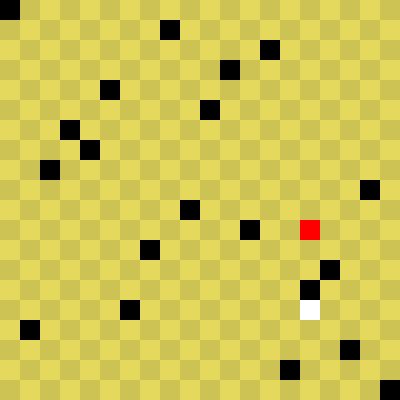


Step 18
Action:  [1]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 17, 'PosY': 9}]


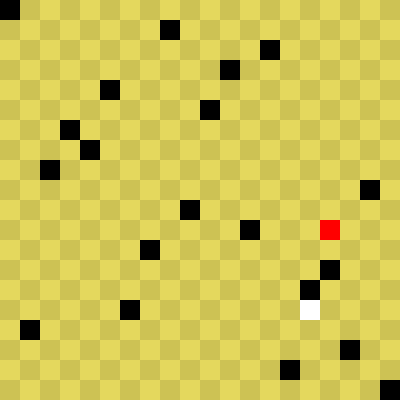


Step 19
Action:  [1]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 18, 'PosY': 9}]


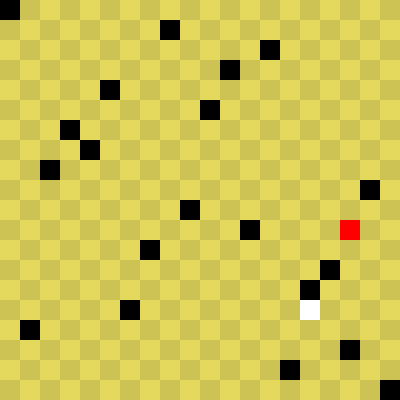


Step 20
Action:  [1]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 19, 'PosY': 9}]


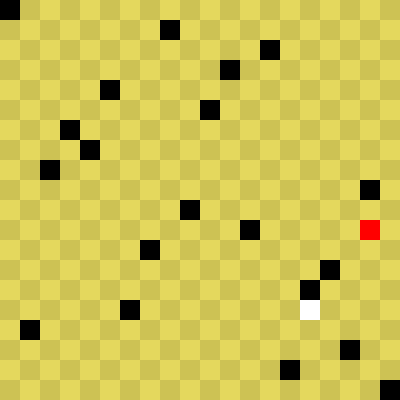


Step 21
Action:  [0]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 18, 'PosY': 9}]


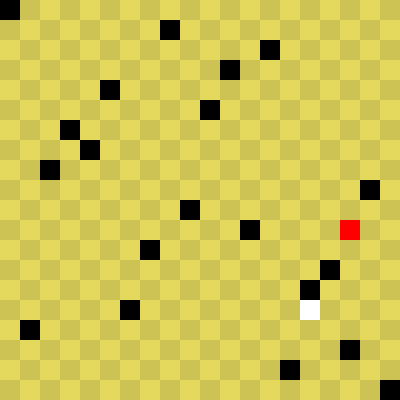


Step 22
Action:  [0]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 17, 'PosY': 9}]


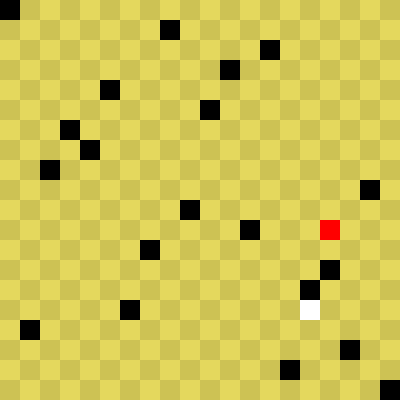


Step 23
Action:  [0]
obs= [[0. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 16, 'PosY': 9}]


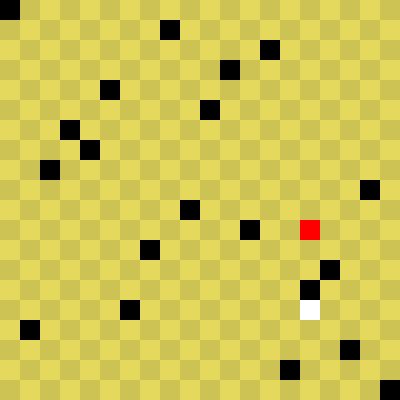


Step 24
Action:  [1]
obs= [[1. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 17, 'PosY': 9}]


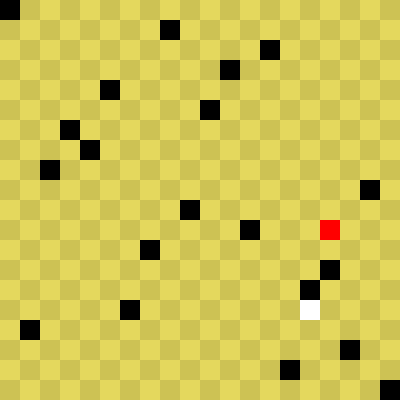


Step 25
Action:  [0]
obs= [[0. 0. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 16, 'PosY': 9}]


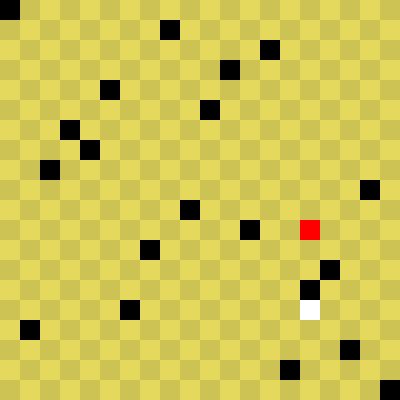


Step 26
Action:  [0]
obs= [[0. 1. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 15, 'PosY': 9}]


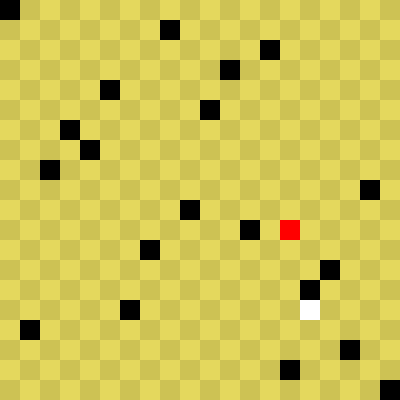


Step 27
Action:  [2]
obs= [[0. 1. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 15, 'PosY': 10}]


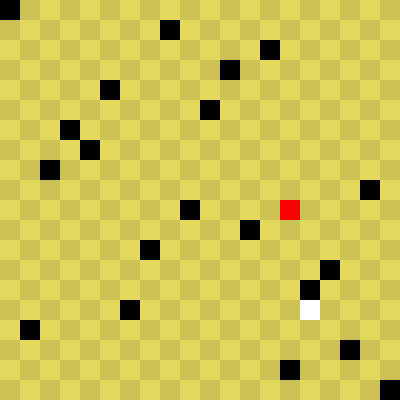


Step 28
Action:  [3]
obs= [[0. 1. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 15, 'PosY': 9}]


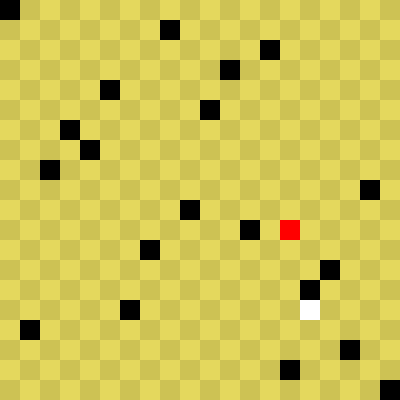


Step 29
Action:  [0]
obs= [[0. 1. 0. 1. 1. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 14, 'PosY': 9}]


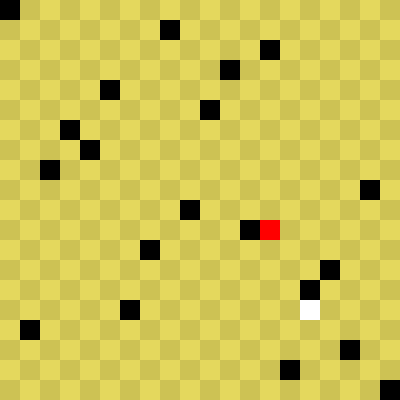


Step 30
Action:  [1]
obs= [[0. 1. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 15, 'PosY': 9}]


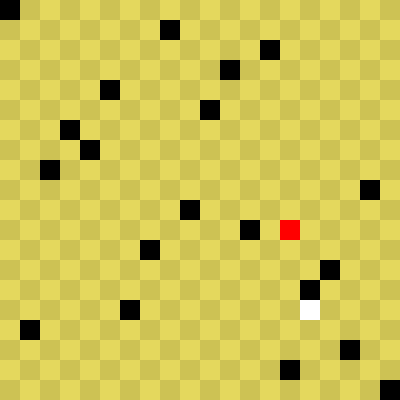


Step 31
Action:  [0]
obs= [[0. 1. 0. 1. 1. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 14, 'PosY': 9}]


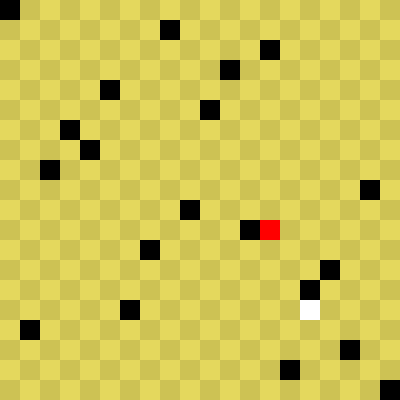


Step 32
Action:  [1]
obs= [[0. 1. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 15, 'PosY': 9}]


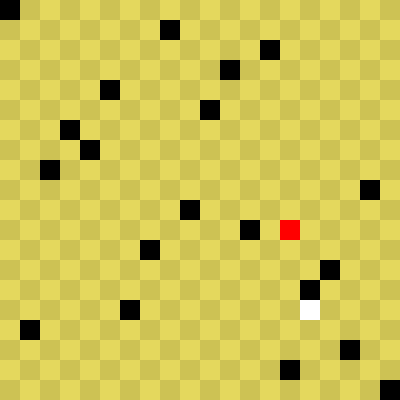


Step 33
Action:  [3]
obs= [[0. 1. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 15, 'PosY': 8}]


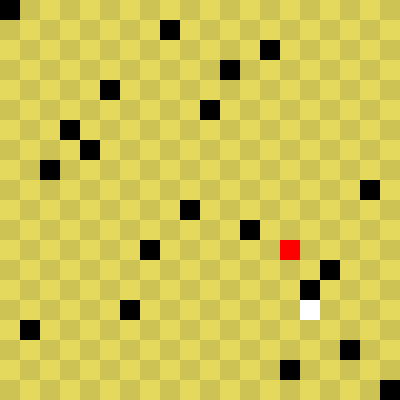


Step 34
Action:  [3]
obs= [[0. 1. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 15, 'PosY': 7}]


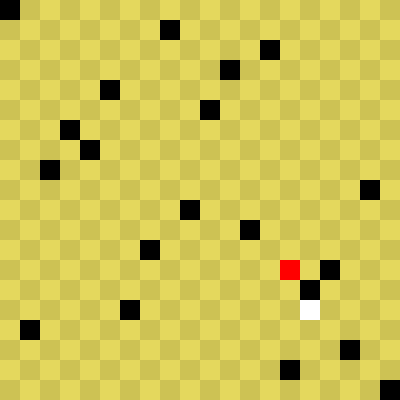


Step 35
Action:  [2]
obs= [[0. 1. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 15, 'PosY': 8}]


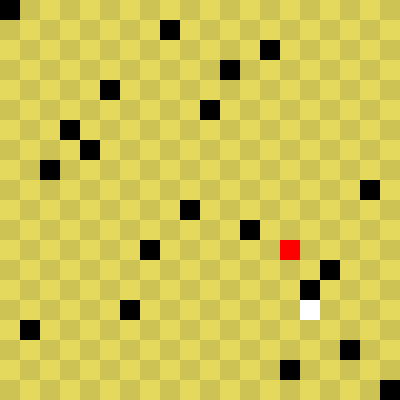


Step 36
Action:  [0]
obs= [[0. 1. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 14, 'PosY': 8}]


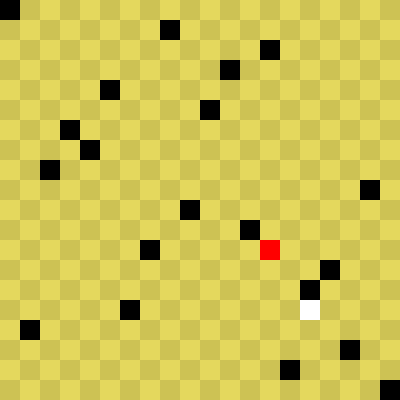


Step 37
Action:  [3]
obs= [[0. 1. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 14, 'PosY': 7}]


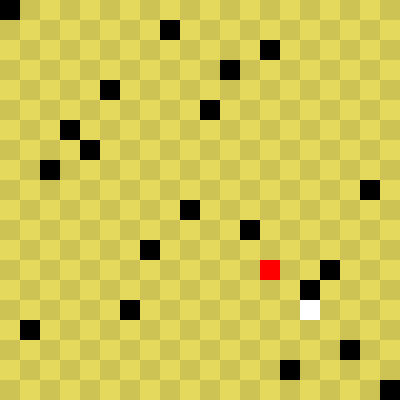


Step 38
Action:  [3]
obs= [[0. 1. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 14, 'PosY': 6}]


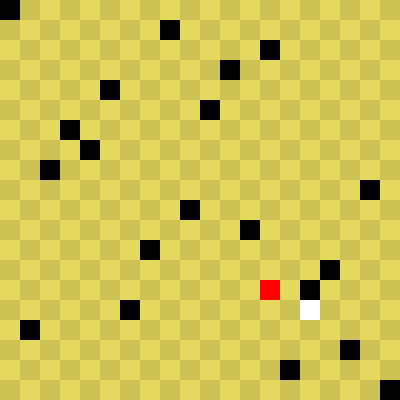


Step 39
Action:  [2]
obs= [[0. 1. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 14, 'PosY': 7}]


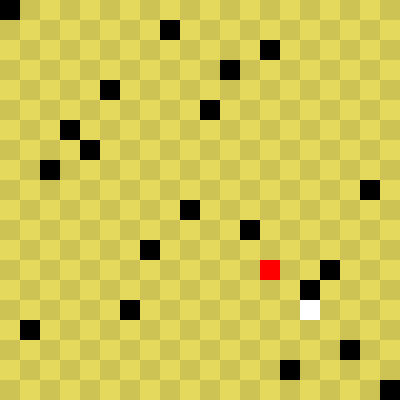


Step 40
Action:  [3]
obs= [[0. 1. 0. 1. 0. 0. 0. 0.]] reward= [0.] done= [False] [{'PosX': 14, 'PosY': 6}]


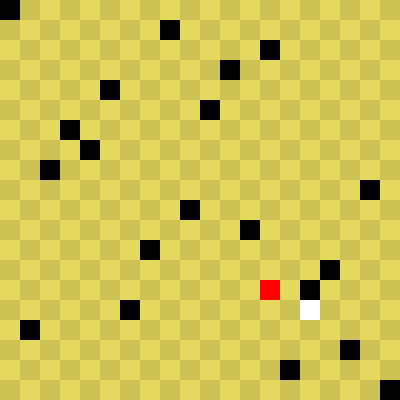

In [ ]:
# Test the trained agent

for x in range(5):
  obs = env.reset()
  n_steps = 40
  for step in range(n_steps):
    time.sleep(.25)
    action, _ = model.predict(obs, deterministic=False)
    print('\n'+"Step {}".format(step + 1))
    print("Action: ", action)
    obs, reward, done, info = env.step(action)
    print('obs=', obs, 'reward=', reward, 'done=', done, info)
    env.render(mode='console')
    if done:
      # Note that the VecEnv resets automatically
      # when a done signal is encountered
      if reward == 1:
        print("Goal reached!", "reward=", reward,'\n')
      if reward == 0:
        print("Failure!", "reward=", reward,'\n')
      break

# **TUTORIALS**

# PyGame - Random Snake Tutorial


In [ ]:
!pip install pygame

In [ ]:
import os
import sys
import random
import time
os.environ["SDL_VIDEODRIVER"] = "dummy"
import pygame
from google.colab.patches import cv2_imshow
from google.colab import output

In [ ]:
class Snake():
    def __init__(self):
        self.length = 1
        self.positions = [((screen_width/2), (screen_height/2))]
        self.direction = random.choice([up, down, left, right])
        self.color = (17, 24, 47)
        # Special thanks to YouTubers Mini - Cafetos and Knivens Beast for raising this issue!
        # Code adjustment courtesy of YouTuber Elija de Hoog
        self.score = 0

    def get_head_position(self):
        return self.positions[0]

    def turn(self, point):
        if self.length > 1 and (point[0]*-1, point[1]*-1) == self.direction:
            return
        else:
            self.direction = point

    def move(self):
        cur = self.get_head_position()
        x,y = self.direction
        new = (((cur[0]+(x*gridsize))%screen_width), (cur[1]+(y*gridsize))%screen_height)
        if len(self.positions) > 2 and new in self.positions[2:]:
            self.reset()
        else:
            self.positions.insert(0,new)
            if len(self.positions) > self.length:
                self.positions.pop()

    def reset(self):
        self.length = 1
        self.positions = [((screen_width/2), (screen_height/2))]
        self.direction = random.choice([up, down, left, right])
        self.score = 0

    def draw(self,surface):
        for p in self.positions:
            r = pygame.Rect((p[0], p[1]), (gridsize,gridsize))
            pygame.draw.rect(surface, self.color, r)
            pygame.draw.rect(surface, (93,216, 228), r, 1)

    def handle_keys(self):
      var = random.uniform(0,1)
      if var >= 0.75:
          self.turn(up)
      elif var >= 0.5:
          self.turn(down)
      elif var >= 0.25:
          self.turn(left)
      else:
          self.turn(right)

class Food():
    def __init__(self):
        self.position = (0,0)
        self.color = (223, 163, 49)
        self.randomize_position()

    def randomize_position(self):
        self.position = (random.randint(0, grid_width-1)*gridsize, random.randint(0, grid_height-1)*gridsize)

    def draw(self, surface):
        r = pygame.Rect((self.position[0], self.position[1]), (gridsize, gridsize))
        pygame.draw.rect(surface, self.color, r)
        pygame.draw.rect(surface, (93, 216, 228), r, 1)

def drawGrid(surface):
    for y in range(0, int(grid_height)):
        for x in range(0, int(grid_width)):
            if (x+y)%2 == 0:
                r = pygame.Rect((x*gridsize, y*gridsize), (gridsize,gridsize))
                pygame.draw.rect(surface,(93,216,228), r)
            else:
                rr = pygame.Rect((x*gridsize, y*gridsize), (gridsize,gridsize))
                pygame.draw.rect(surface, (84,194,205), rr)

screen_width = 480
screen_height = 480

gridsize = 20
grid_width = screen_width/gridsize
grid_height = screen_height/gridsize

up = (0,-1)
down = (0,1)
left = (-1,0)
right = (1,0)

def main():
    pygame.init()

    clock = pygame.time.Clock()
    screen = pygame.display.set_mode((screen_width, screen_height), 0, 32)

    surface = pygame.Surface(screen.get_size())
    surface = surface.convert()
    drawGrid(surface)

    snake = Snake()
    food = Food()

    myfont = pygame.font.SysFont("monospace",16)

    while (True):
        clock.tick(4)
        snake.handle_keys()
        drawGrid(surface)
        snake.move()
        if snake.get_head_position() == food.position:
            snake.length += 1
            snake.score += 1
            food.randomize_position()
        snake.draw(surface)
        food.draw(surface)
        screen.blit(surface, (0,0))
        text = myfont.render("Score {0}".format(snake.score), 1, (0,0,0))
        screen.blit(text, (5,10))
        pygame.display.update()
        image = pygame.surfarray.array3d(screen)
        image = image.transpose([1, 0, 2])
        # output.clear(wait=True)
        print('\n')
        cv2_imshow(image)

main()

# Stable Baselines3 Tutorial


## Creating a custom Gym environment

Github repo: https://github.com/araffin/rl-tutorial-jnrr19/tree/sb3/

Stable-Baselines3: https://github.com/DLR-RM/stable-baselines3

Documentation: https://stable-baselines3.readthedocs.io/en/master/

RL Baselines3 zoo: https://github.com/DLR-RM/rl-baselines3-zoo


## Introduction

In this notebook, you will learn how to use your own environment following the OpenAI Gym interface.
Once it is done, you can easily use any compatible (depending on the action space) RL algorithm from Stable Baselines on that environment.

## Install Dependencies and Stable Baselines3 Using Pip


In [ ]:
!pip install stable-baselines3[extra]

     |████████████████████████████████| 2.8 MB 5.1 MB/s 
Reason for being yanked: re-release with new wheels
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py", line 385, in run
    confli

## First steps with the gym interface

As you have noticed in the previous notebooks, an environment that follows the gym interface is quite simple to use.
It provides to this user mainly three methods:
- `reset()` called at the beginning of an episode, it returns an observation
- `step(action)` called to take an action with the environment, it returns the next observation, the immediate reward, whether the episode is over and additional information
- (Optional) `render(method='human')` which allow to visualize the agent in action. Note that graphical interface does not work on google colab, so we cannot use it directly (we have to rely on `method='rbg_array'` to retrieve an image of the scene

Under the hood, it also contains two useful properties:
- `observation_space` which one of the gym spaces (`Discrete`, `Box`, ...) and describe the type and shape of the observation
- `action_space` which is also a gym space object that describes the action space, so the type of action that can be taken

The best way to learn about gym spaces is to look at the [source code](https://github.com/openai/gym/tree/master/gym/spaces), but you need to know at least the main ones:
- `gym.spaces.Box`: A (possibly unbounded) box in $R^n$. Specifically, a Box represents the Cartesian product of n closed intervals. Each interval has the form of one of [a, b], (-oo, b], [a, oo), or (-oo, oo). Example: A 1D-Vector or an image observation can be described with the Box space.
```python
# Example for using image as input:
observation_space = spaces.Box(low=0, high=255, shape=(HEIGHT, WIDTH, N_CHANNELS), dtype=np.uint8)
```                                       

- `gym.spaces.Discrete`: A discrete space in $\{ 0, 1, \dots, n-1 \}$
  Example: if you have two actions ("left" and "right") you can represent your action space using `Discrete(2)`, the first action will be 0 and the second 1.



[Documentation on custom env](https://stable-baselines3.readthedocs.io/en/master/guide/custom_env.html)

In [ ]:
import gym

env = gym.make("CartPole-v1")

# Box(4,) means that it is a Vector with 4 components
print("Observation space:", env.observation_space)
print("Shape:", env.observation_space.shape)
# Discrete(2) means that there is two discrete actions
print("Action space:", env.action_space)

# The reset method is called at the beginning of an episode
obs = env.reset()
# Sample a random action
action = env.action_space.sample()
print("Sampled action:", action)
obs, reward, done, info = env.step(action)
# Note the obs is a numpy array
# info is an empty dict for now but can contain any debugging info
# reward is a scalar
print(obs.shape, reward, done, info)

Observation space: Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)
Shape: (4,)
Action space: Discrete(2)
Sampled action: 0
(4,) 1.0 False {}


##  Gym env skeleton

In practice this is how a gym environment looks like.
Here, we have implemented a simple grid world were the agent must learn to go always left.

In [ ]:
import numpy as np
import gym
from gym import spaces


class GoLeftEnv(gym.Env):
  """
  Custom Environment that follows gym interface.
  This is a simple env where the agent must learn to go always left. 
  """
  # Because of google colab, we cannot implement the GUI ('human' render mode)
  metadata = {'render.modes': ['console']}
  # Define constants for clearer code
  LEFT = 0
  RIGHT = 1

  def __init__(self, grid_size=10):
    super(GoLeftEnv, self).__init__()

    # Size of the 1D-grid
    self.grid_size = grid_size
    # Initialize the agent at the right of the grid
    self.agent_pos = grid_size - 1

    # Define action and observation space
    # They must be gym.spaces objects
    # Example when using discrete actions, we have two: left and right
    n_actions = 2
    self.action_space = spaces.Discrete(n_actions)
    # The observation will be the coordinate of the agent
    # this can be described both by Discrete and Box space
    self.observation_space = spaces.Box(low=0, high=self.grid_size,
                                        shape=(1,), dtype=np.float32)

  def reset(self):
    """
    Important: the observation must be a numpy array
    :return: (np.array) 
    """
    # Initialize the agent at the right of the grid
    self.agent_pos = self.grid_size - 1
    # here we convert to float32 to make it more general (in case we want to use continuous actions)
    return np.array([self.agent_pos]).astype(np.float32)

  def step(self, action):
    if action == self.LEFT:
      self.agent_pos -= 1
    elif action == self.RIGHT:
      self.agent_pos += 1
    else:
      raise ValueError("Received invalid action={} which is not part of the action space".format(action))

    # Account for the boundaries of the grid
    self.agent_pos = np.clip(self.agent_pos, 0, self.grid_size)

    # Are we at the left of the grid?
    done = bool(self.agent_pos == 0)

    # Null reward everywhere except when reaching the goal (left of the grid)
    reward = 1 if self.agent_pos == 0 else 0

    # Optionally we can pass additional info, we are not using that for now
    info = {}

    return np.array([self.agent_pos]).astype(np.float32), reward, done, info

  def render(self, mode='console'):
    if mode != 'console':
      raise NotImplementedError()
    # agent is represented as a cross, rest as a dot
    print("." * self.agent_pos, end="")
    print("x", end="")
    print("." * (self.grid_size - self.agent_pos))

  def close(self):
    pass
    

### Validate the environment

Stable Baselines3 provides a [helper](https://stable-baselines3.readthedocs.io/en/master/common/env_checker.html) to check that your environment follows the Gym interface. It also optionally checks that the environment is compatible with Stable-Baselines (and emits warning if necessary).

In [ ]:
from stable_baselines3.common.env_checker import check_env

In [ ]:
env = GoLeftEnv()
# If the environment don't follow the interface, an error will be thrown
check_env(env, warn=True)

### Testing the environment

In [ ]:
env = GoLeftEnv(grid_size=10)

obs = env.reset()
env.render()

print(env.observation_space)
print(env.action_space)
print(env.action_space.sample())

GO_LEFT = 0
# Hardcoded best agent: always go left!
n_steps = 20
for step in range(n_steps):
  print("Step {}".format(step + 1))
  obs, reward, done, info = env.step(GO_LEFT)
  print('obs=', obs, 'reward=', reward, 'done=', done)
  env.render()
  if done:
    print("Goal reached!", "reward=", reward)
    break

.........x.
Box(0.0, 10.0, (1,), float32)
Discrete(2)
1
Step 1
obs= [8.] reward= 0 done= False
........x..
Step 2
obs= [7.] reward= 0 done= False
.......x...
Step 3
obs= [6.] reward= 0 done= False
......x....
Step 4
obs= [5.] reward= 0 done= False
.....x.....
Step 5
obs= [4.] reward= 0 done= False
....x......
Step 6
obs= [3.] reward= 0 done= False
...x.......
Step 7
obs= [2.] reward= 0 done= False
..x........
Step 8
obs= [1.] reward= 0 done= False
.x.........
Step 9
obs= [0.] reward= 1 done= True
x..........
Goal reached! reward= 1


### Try it with Stable-Baselines

Once your environment follow the gym interface, it is quite easy to plug in any algorithm from stable-baselines

In [ ]:
from stable_baselines3 import PPO, A2C # DQN coming soon
from stable_baselines3.common.env_util import make_vec_env

# Instantiate the env
env = GoLeftEnv(grid_size=10)
# wrap it
env = make_vec_env(lambda: env, n_envs=1)

In [ ]:
# Train the agent
model = A2C('MlpPolicy', env, verbose=1).learn(5000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 544      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.38    |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 6.01e-05 |
|    value_loss         | 2.4e-07  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 607      |
|    iterations         | 200      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.243   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | 4.34e-06 |
|    value_loss      

In [ ]:
# Test the trained agent
obs = env.reset()
n_steps = 20
for step in range(n_steps):
  action, _ = model.predict(obs, deterministic=True)
  print("Step {}".format(step + 1))
  print("Action: ", action)
  obs, reward, done, info = env.step(action)
  print('obs=', obs, 'reward=', reward, 'done=', done)
  env.render(mode='console')
  if done:
    # Note that the VecEnv resets automatically
    # when a done signal is encountered
    print("Goal reached!", "reward=", reward)
    break

Step 1
Action:  [1]
obs= [[10.]] reward= [0.] done= [False]
..........x
Step 2
Action:  [1]
obs= [[10.]] reward= [0.] done= [False]
..........x
Step 3
Action:  [1]
obs= [[10.]] reward= [0.] done= [False]
..........x
Step 4
Action:  [1]
obs= [[10.]] reward= [0.] done= [False]
..........x
Step 5
Action:  [1]
obs= [[10.]] reward= [0.] done= [False]
..........x
Step 6
Action:  [1]
obs= [[10.]] reward= [0.] done= [False]
..........x
Step 7
Action:  [1]
obs= [[10.]] reward= [0.] done= [False]
..........x
Step 8
Action:  [1]
obs= [[10.]] reward= [0.] done= [False]
..........x
Step 9
Action:  [1]
obs= [[10.]] reward= [0.] done= [False]
..........x
Step 10
Action:  [1]
obs= [[10.]] reward= [0.] done= [False]
..........x
Step 11
Action:  [1]
obs= [[10.]] reward= [0.] done= [False]
..........x
Step 12
Action:  [1]
obs= [[10.]] reward= [0.] done= [False]
..........x
Step 13
Action:  [1]
obs= [[10.]] reward= [0.] done= [False]
..........x
Step 14
Action:  [1]
obs= [[10.]] reward= [0.] done= [False]

# Keras-Gym Tutorial

In [ ]:
import gym
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Configuration parameters for the whole setup
seed = 42
gamma = 0.99  # Discount factor for past rewards
max_steps_per_episode = 10000
env = gym.make("CartPole-v0")  # Create the environment
env.seed(seed)
eps = np.finfo(np.float32).eps.item()  # Smallest number such that 1.0 + eps != 1.0

In [ ]:
num_inputs = 4
num_actions = 2
num_hidden = 128

inputs = layers.Input(shape=(num_inputs,))
common = layers.Dense(num_hidden, activation="relu")(inputs)
action = layers.Dense(num_actions, activation="softmax")(common)
critic = layers.Dense(1)(common)

model = keras.Model(inputs=inputs, outputs=[action, critic])

In [ ]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 4)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          640         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 2)            258         dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 1)            129         dense[0][0]                      
Total params: 1,027
Trainable params: 1,027
Non-trainable params: 0
__________________________

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)
huber_loss = keras.losses.Huber()
action_probs_history = []
critic_value_history = []
rewards_history = []
running_reward = 0
episode_count = 0

while True:  # Run until solved
    state = env.reset()
    episode_reward = 0
    with tf.GradientTape() as tape:
        for timestep in range(1, max_steps_per_episode):
            # env.render(); Adding this line would show the attempts
            # of the agent in a pop up window.

            state = tf.convert_to_tensor(state)
            state = tf.expand_dims(state, 0)

            # Predict action probabilities and estimated future rewards
            # from environment state
            action_probs, critic_value = model(state)
            critic_value_history.append(critic_value[0, 0])

            # Sample action from action probability distribution
            action = np.random.choice(num_actions, p=np.squeeze(action_probs))
            action_probs_history.append(tf.math.log(action_probs[0, action]))

            # Apply the sampled action in our environment
            state, reward, done, _ = env.step(action)
            rewards_history.append(reward)
            episode_reward += reward

            if done:
                break

        # Update running reward to check condition for solving
        running_reward = 0.05 * episode_reward + (1 - 0.05) * running_reward

        # Calculate expected value from rewards
        # - At each timestep what was the total reward received after that timestep
        # - Rewards in the past are discounted by multiplying them with gamma
        # - These are the labels for our critic
        returns = []
        discounted_sum = 0
        for r in rewards_history[::-1]:
            discounted_sum = r + gamma * discounted_sum
            returns.insert(0, discounted_sum)

        # Normalize
        returns = np.array(returns)
        returns = (returns - np.mean(returns)) / (np.std(returns) + eps)
        returns = returns.tolist()

        # Calculating loss values to update our network
        history = zip(action_probs_history, critic_value_history, returns)
        actor_losses = []
        critic_losses = []
        for log_prob, value, ret in history:
            # At this point in history, the critic estimated that we would get a
            # total reward = `value` in the future. We took an action with log probability
            # of `log_prob` and ended up recieving a total reward = `ret`.
            # The actor must be updated so that it predicts an action that leads to
            # high rewards (compared to critic's estimate) with high probability.
            diff = ret - value
            actor_losses.append(-log_prob * diff)  # actor loss

            # The critic must be updated so that it predicts a better estimate of
            # the future rewards.
            critic_losses.append(
                huber_loss(tf.expand_dims(value, 0), tf.expand_dims(ret, 0))
            )

        # Backpropagation
        loss_value = sum(actor_losses) + sum(critic_losses)
        grads = tape.gradient(loss_value, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        # Clear the loss and reward history
        action_probs_history.clear()
        critic_value_history.clear()
        rewards_history.clear()

    # Log details
    episode_count += 1
    if episode_count % 10 == 0:
        template = "running reward: {:.2f} at episode {}"
        print(template.format(running_reward, episode_count))

    if running_reward > 195:  # Condition to consider the task solved
        print("Solved at episode {}!".format(episode_count))
        break

running reward: 8.93 at episode 10
running reward: 20.89 at episode 20
running reward: 30.46 at episode 30
running reward: 30.69 at episode 40
running reward: 26.42 at episode 50
running reward: 21.04 at episode 60
running reward: 23.64 at episode 70
running reward: 35.10 at episode 80
running reward: 38.89 at episode 90
running reward: 30.15 at episode 100
running reward: 37.57 at episode 110
running reward: 37.56 at episode 120
running reward: 35.97 at episode 130
running reward: 44.34 at episode 140
running reward: 47.83 at episode 150
running reward: 71.22 at episode 160
running reward: 112.90 at episode 170
running reward: 138.88 at episode 180
running reward: 159.28 at episode 190
running reward: 152.98 at episode 200
running reward: 139.37 at episode 210
running reward: 131.02 at episode 220
running reward: 100.06 at episode 230
running reward: 87.68 at episode 240
running reward: 103.92 at episode 250
running reward: 138.12 at episode 260
running reward: 162.95 at episode 270
r